<a href="https://colab.research.google.com/github/Dann-El/Projeto-Comunicacao-e-Redes/blob/main/GrafoCr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto Comunicação & Redes:





# Colaboração entre personagens da Marvel Comics: Uma análise, construção e manipulação da representação de dados em formato de grafos"

   -*Daniel de Jesus Martins #11202131751*

   -*Matheus Formagio Santin #11202131751*

   -*Gabriela Maria Badin Correa #11202130518*


 Dados coletados a partir de uma das fontes indicadas pelo professor, no notebook 4. Os dados não precisaram ser editados ou alterados.


##Introdução
A editora de quadrinhos Marvel Comics possui muitos personagens, equipes de heróis e vilões que possuem revistas solo ou aparecem como coadjuvantes. É bem sabido que muitos deles geralmente colaboram e se conectam com outros personagens em muitas jornadas. Aqui foi analisada uma rede de dados explorando esse conteúdo, as principais ligações entre personagens não tão próximos assim.


A rede de dados escolhida:

 - Não forma um grafo denso;

 - Forma grafo desconexo;

- Possui 350 vertices e 346 nós, confirmando a descrição da densidade;

- Um subgrafo será extraído para análise, a fim de extrair informações que são irrelevantes ou não são possiveis em um grafo desconexo;

- Foi feita uma análise genérica, visto que os vértices não tem outra função a não ser indicar interações;

- É um grafo não-direcionado;

- As arestas não tem peso;

- A principal diferença os atributos da coluna "grupo",

- O principal ponto em comum entre eles também.

Fonte dos dados: https://www.kaggle.com/datasets/trnguyen1510/the-marvel-comic-characters-partnerships

##Extraindo dados: primeiros passos e construção do grafo

In [ ]:
import networkx as nx
import numpy as np

In [ ]:

#https://www.kaggle.com/datasets/trnguyen1510/the-marvel-comic-characters-partnerships
import pandas as pd  

# vertices do arquivo "nodes"
with open("/content/nodes.csv") as f:
     pares=f.read().splitlines()

node_1 = []
node_2 = []
node_3 = []

#separando arquivo em colunas
for i, cont in zip(pares, range(len(pares))):

     if cont == 0:
         continue  

     node_1.append(i.split(',')[0])
     node_2.append(i.split(',')[1])
     node_3.append(i.split(',')[2])

df = pd.DataFrame({'group': node_1, 'id' : node_2, 'size' : node_3})

print(df)

    group                        id size
0       1                Baron Zemo    2
1       1                  N'astirh    3
2       0              Silver Sable    1
3       0     Hope Summers (comics)    1
4       0  Magik (Illyana Rasputin)    1
..    ...                       ...  ...
345     1                  Bi-Beast    2
346     0                    Namora    3
347     1            Alexander Bont    2
348     1                   Giganto    2
349     0              Fin (comics)    3

[350 rows x 3 columns]


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [ ]:
  with open("/content/edges.csv") as g:
     lista=g.read().splitlines()

#repetindo o mesmo processo com o segundo arquivo 
  edge_1 = []
  edge_2 = []

for i, cont in zip(lista, range(len(lista))):

 
     if cont == 0:
       continue  
     edge_1.append(i.split(',')[0])
     edge_2.append(i.split(',')[1])


#armazeno aqui dados em dataframe
dg = pd.DataFrame({'source': edge_1, 'target' : edge_2})
print(dg)

                         source                     target
0                    Baron Zemo  Blackout (Marcus Daniels)
1                    Baron Zemo            Vermin (comics)
2                      N'astirh                       S'ym
3                      N'astirh    Belasco (Marvel Comics)
4                      N'astirh             Madelyne Pryor
..                          ...                        ...
341             Captain America               Rikki Barnes
342                   Red Skull       Viper (Madame Hydra)
343                   Red Skull                 Arnim Zola
344  Apocalypse (Marvel Comics)            Mister Sinister
345                      Namora               Fin (comics)

[346 rows x 2 columns]


Extraímos dados de dois arquivos: o primeiro com atributos ligados aos nós, e o segundo onde mostra a conexão dos nós com outros, a fim de formar arestas. Abaixo a primeira contrução do Grafo a partir do primeiro arquivo.

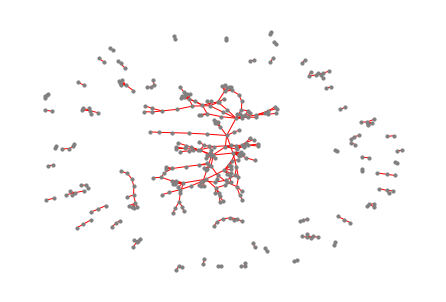

In [ ]:
G = nx.from_pandas_edgelist(
    dg,
    "source",
    "target",
    create_using=nx.Graph()

)


nx.draw(G, label=True, node_color='grey', node_size = 10, edge_color='red')

Aqui fazemos o mesmo, desta vez ligando os nós aos seus atributos.

[('Baron Zemo', {'group': 1, 'size': 2}), ('Blackout (Marcus Daniels)', {'group': 1, 'size': 1}), ('Vermin (comics)', {'group': 1, 'size': 1}), ("N'astirh", {'group': 1, 'size': 3}), ("S'ym", {'group': 1, 'size': 2}), ('Belasco (Marvel Comics)', {'group': 1, 'size': 3}), ('Madelyne Pryor', {'group': 1, 'size': 2}), ('Silver Sable', {'group': 0, 'size': 1}), ('Peregrine (comics)', {'group': 0, 'size': 1}), ('Hope Summers (comics)', {'group': 0, 'size': 1}), ('Cable (comics)', {'group': 0, 'size': 4}), ('Magik (Illyana Rasputin)', {'group': 0, 'size': 1}), ('Night Thrasher (Dwayne Taylor)', {'group': 0, 'size': 2}), ("Midnight's Fire", {'group': 1, 'size': 1}), ('Silhouette (comics)', {'group': 0, 'size': 1}), ('Orb (comics)', {'group': 1, 'size': 1}), ('Justin Hammer', {'group': 1, 'size': 5}), ('Forge (comics)', {'group': 0, 'size': 1}), ('Storm (Marvel Comics)', {'group': 0, 'size': 2}), ('U.S. Agent (character)', {'group': 0, 'size': 1}), ('Battlestar (comics)', {'group': 0, 'size': 

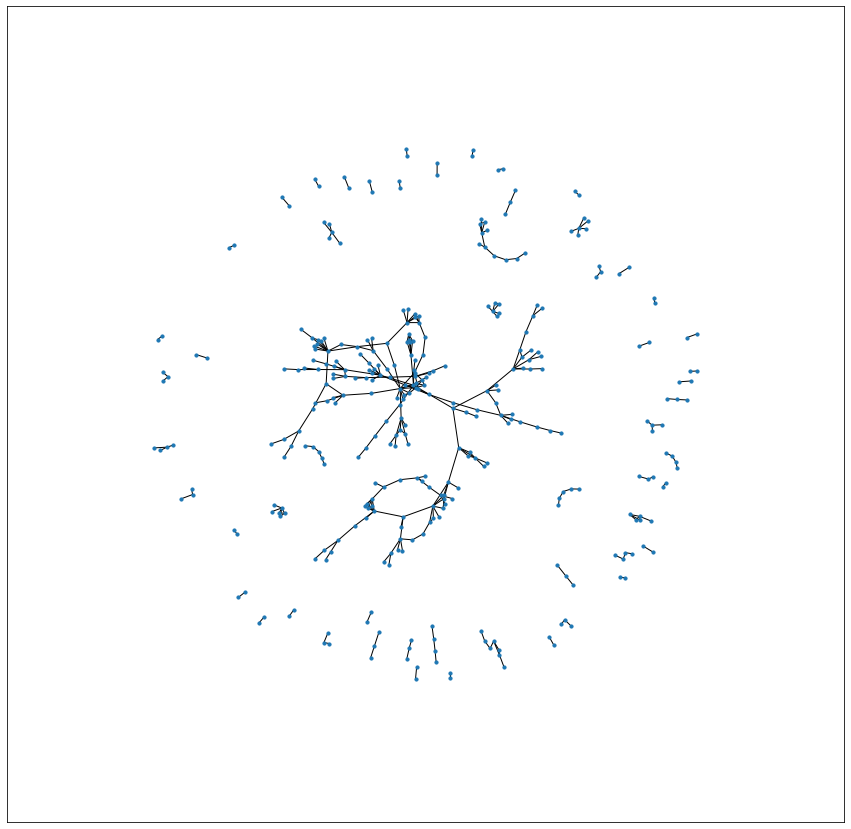

In [ ]:
edges = pd.read_csv('edges.csv', sep=',')

G = nx.from_pandas_edgelist(edges, 'source', 'target')

nodes = pd.read_csv('nodes.csv', sep=',')
data = nodes.set_index('id').to_dict('index').items()
G.add_nodes_from(data)
print(G.nodes(data=True))
print(G.edges(data=True))

#com a biblioteca numpy instalada, podemos adicionar margens ao nosso grado e definir um tamanho para elas.
#o tamanho da foto também pode ser definido, usando dois números iguais para.deixar quadrado
#usando a variável 'pos', deixo o grafo em formato circular
plt.figure(figsize =(15, 15))
pos = nx.circular_layout(G)
#Ficaria confuso em formato circular, por isso optei por aleatório.
nx.draw_networkx(G, with_labels=False, node_size=10)

plt.gca().margins(0.2, 0.2)
create_using=nx.Graph(G)

Também podemos separar os vertices em grupos de acordo com seus atributos. Neste caso, 0 para heróis, 1 para vilões e 2 para anti-heróis.
Os nomes podem ser incluídos na imagem usando a função 'with_labels=True', porém optamos por não incluir nós grafos devido ao alto número de vertices, que invalidam a leitura apropriada de cada nome.
Aqui faremos também algumas formatações estéticas no grafo

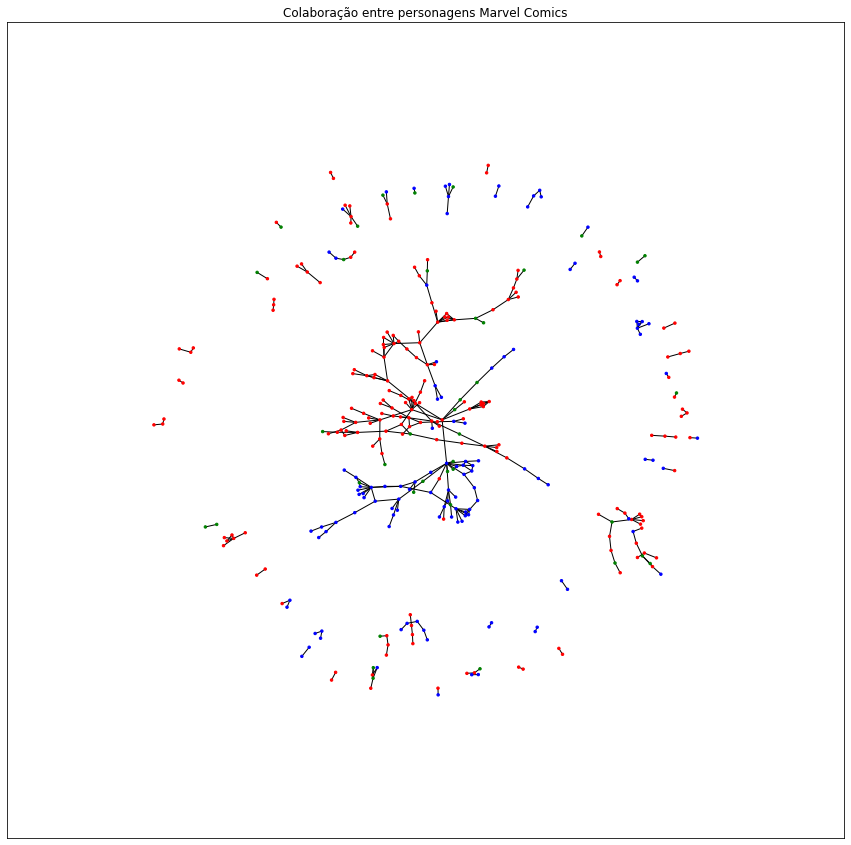

In [ ]:
color_state_map = {0: 'blue', 1: 'red', 2: 'green'}
#foi aqui definido heróis como azuis, vilões como vermelhos e anti-heróis como verdes
groups = np.random.choice([0,1,2], size=10)
nx.set_node_attributes(G, dict(zip(G.nodes(), groups)), 'group')
node_color=[color_state_map[node[1]['group']]
                    for node in G.nodes(data=True)]
#tamanho da figura
plt.figure(figsize =(15, 15))
nx.draw_networkx(G, with_labels=False, node_size=6, node_color=node_color)
#títulocsv
plt.title("Colaboração entre personagens Marvel Comics")
#margens, para a questão astética
plt.gca().margins(0.2, 0.2)
create_using=nx.Graph(G)

Próxima figura com dimensões extensas, a fim de tornar nomes visíveis, que será possível ler com zoom na imagem

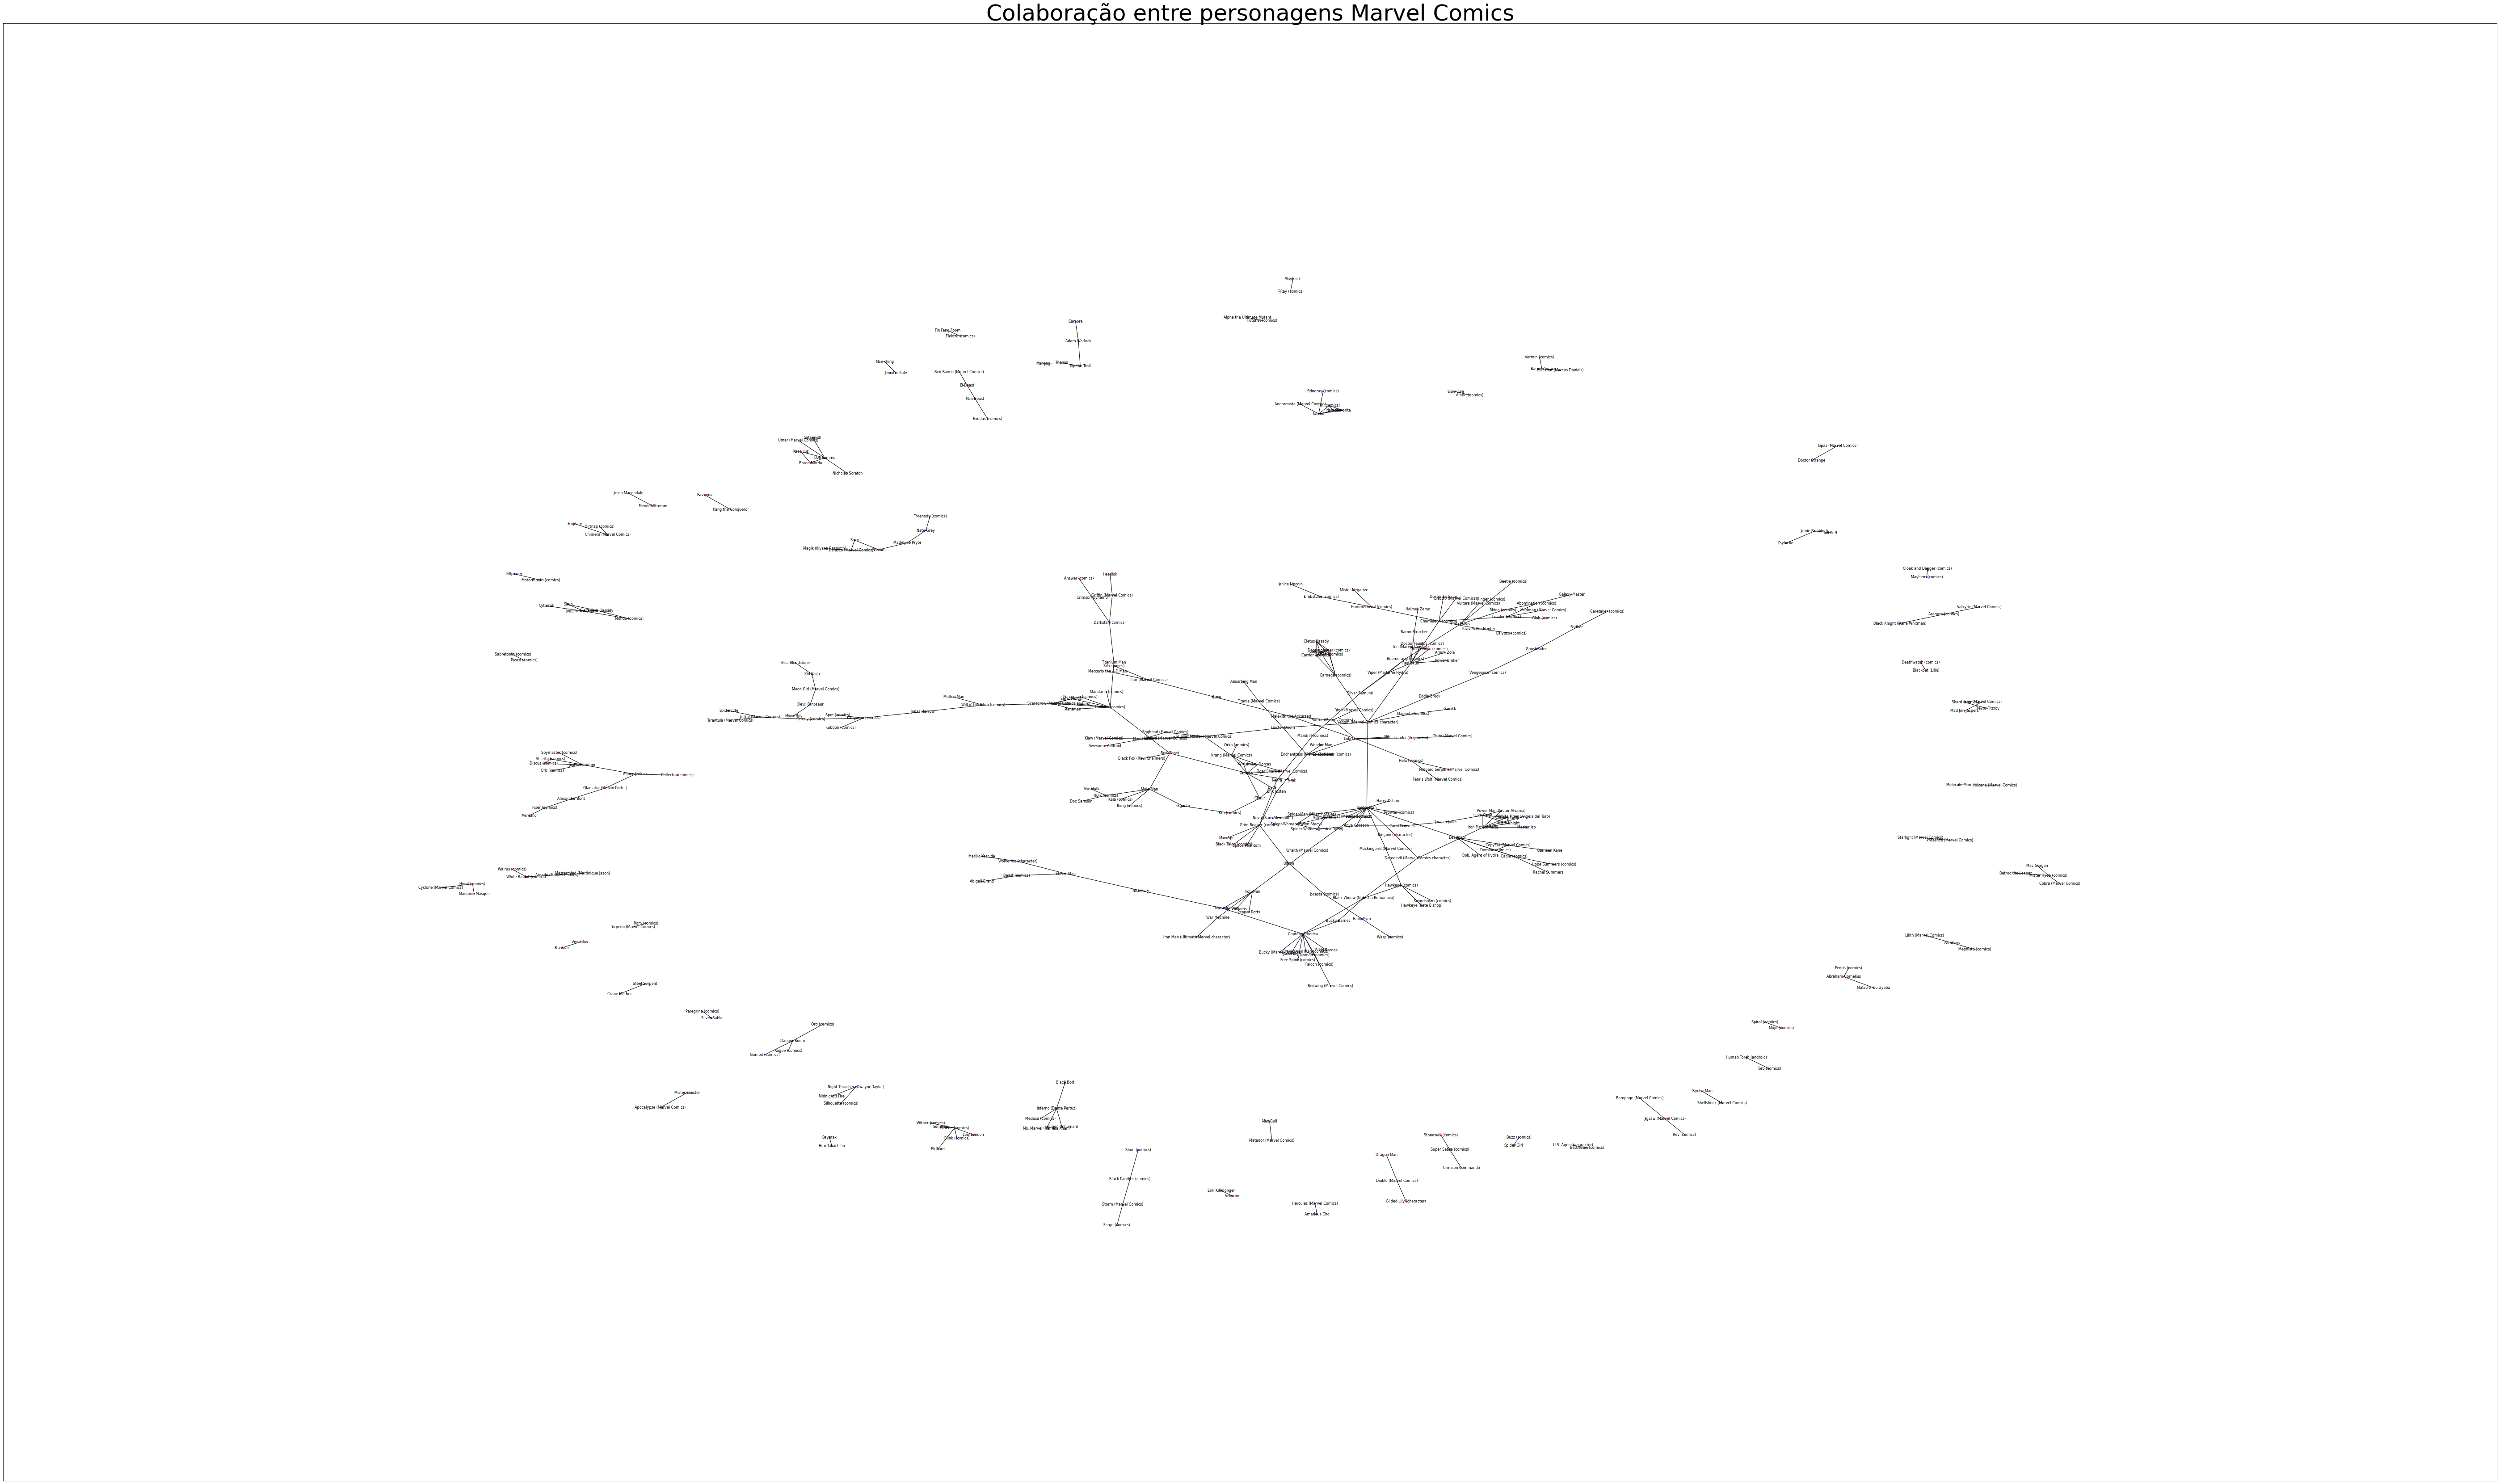

In [ ]:
color_state_map = {0: 'blue', 1: 'red', 2: 'green'}
#foi aqui definido heróis como azuis, vilões como vermelhos e anti-heróis como verdes
groups = np.random.choice([0,1,2], size=10)
nx.set_node_attributes(G, dict(zip(G.nodes(), groups)), 'group')
node_color=[color_state_map[node[1]['group']]
                    for node in G.nodes(data=True)]
pos=nx.spring_layout(G)
#tamanho da figura
plt.figure(figsize =(100, 60))
nx.draw_networkx(G, pos, with_labels=True, font_size=8, node_size=6, node_color=node_color)
#título
plt.title("Colaboração entre personagens Marvel Comics", fontsize=50)
#margens, para a questão astética
plt.gca().margins(0.2, 0.2)
create_using=nx.Graph(G)

O grafo acima contém um número aproximado de vértices e arestas, o que significa não só que ele é denso, mas que pode haver um grande número de vértices desconetados, o que no caso é verdade. 
Porém é possivel, do nosso grafo desconexo G, extrair um subgrafo H de interesse, de modo que esse novo grafo não seja desconexo.

In [ ]:
#primeiro igualamos H a G, a fim de não modificar o grafo G original;
H = G.copy()

Veremos agora alguns conceitos iniciais, os quais serão aprofundados em seus respectivos tópicos.

In [ ]:
#Agora listaremos todos os vertices dos subgrafos
for component in list(nx.connected_components(H)):
  #Aqui usamos a ordem do segundo maior grafo desconexo como parametro;
  if len(component)<=12:
    #Uma vez listados, removemos seus vértices.
    for node in component:
      H.remove_node(node)

In [ ]:
#O novo grafo foi gerado.
H.order(), H.size()

(350, 346)

In [ ]:
color_state_map = {0: 'blue', 1: 'red', 2: 'green'}
#foi aqui definido heróis como azuis, vilões como vermelhos e anti-heróis como verdes
groups = np.random.choice([0,1,2], size=10)
nx.set_node_attributes(H, dict(zip(H.nodes(), groups)), 'group')


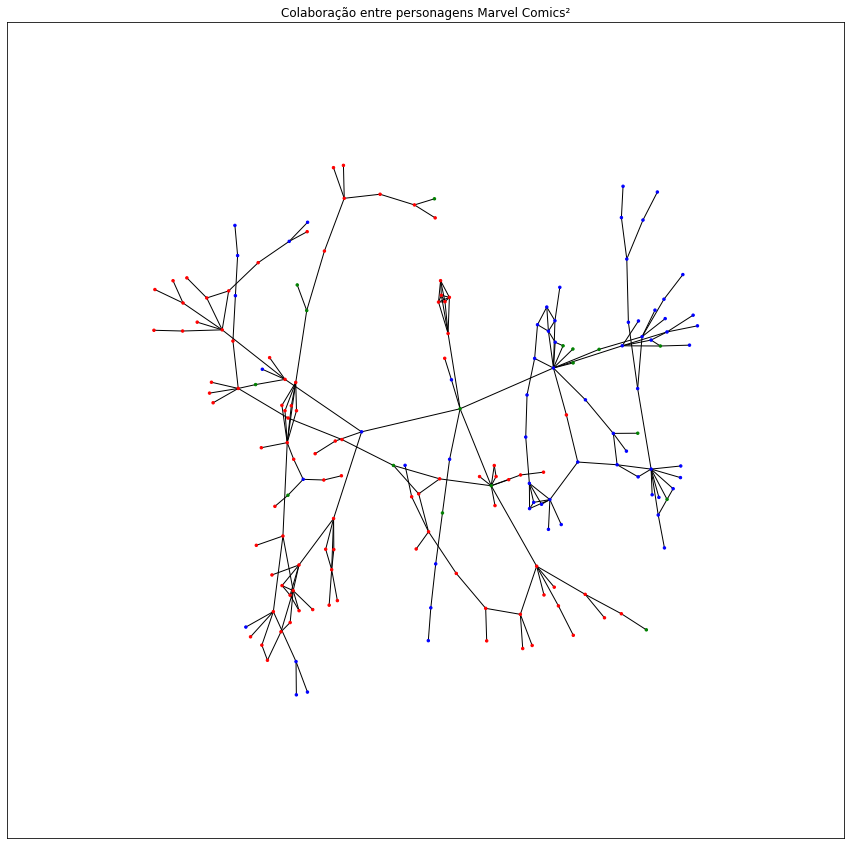

In [ ]:
node_color=[color_state_map[node[1]['group']]
                    for node in H.nodes(data=True)]
#tamanho da figura
plt.figure(figsize =(15, 15))
nx.draw_networkx(H, with_labels=False, node_size=6, node_color=node_color)
#títulocsv
plt.title("Colaboração entre personagens Marvel Comics²")
#margens, para a questão astética
plt.gca().margins(0.2, 0.2)
create_using=nx.Graph(H)

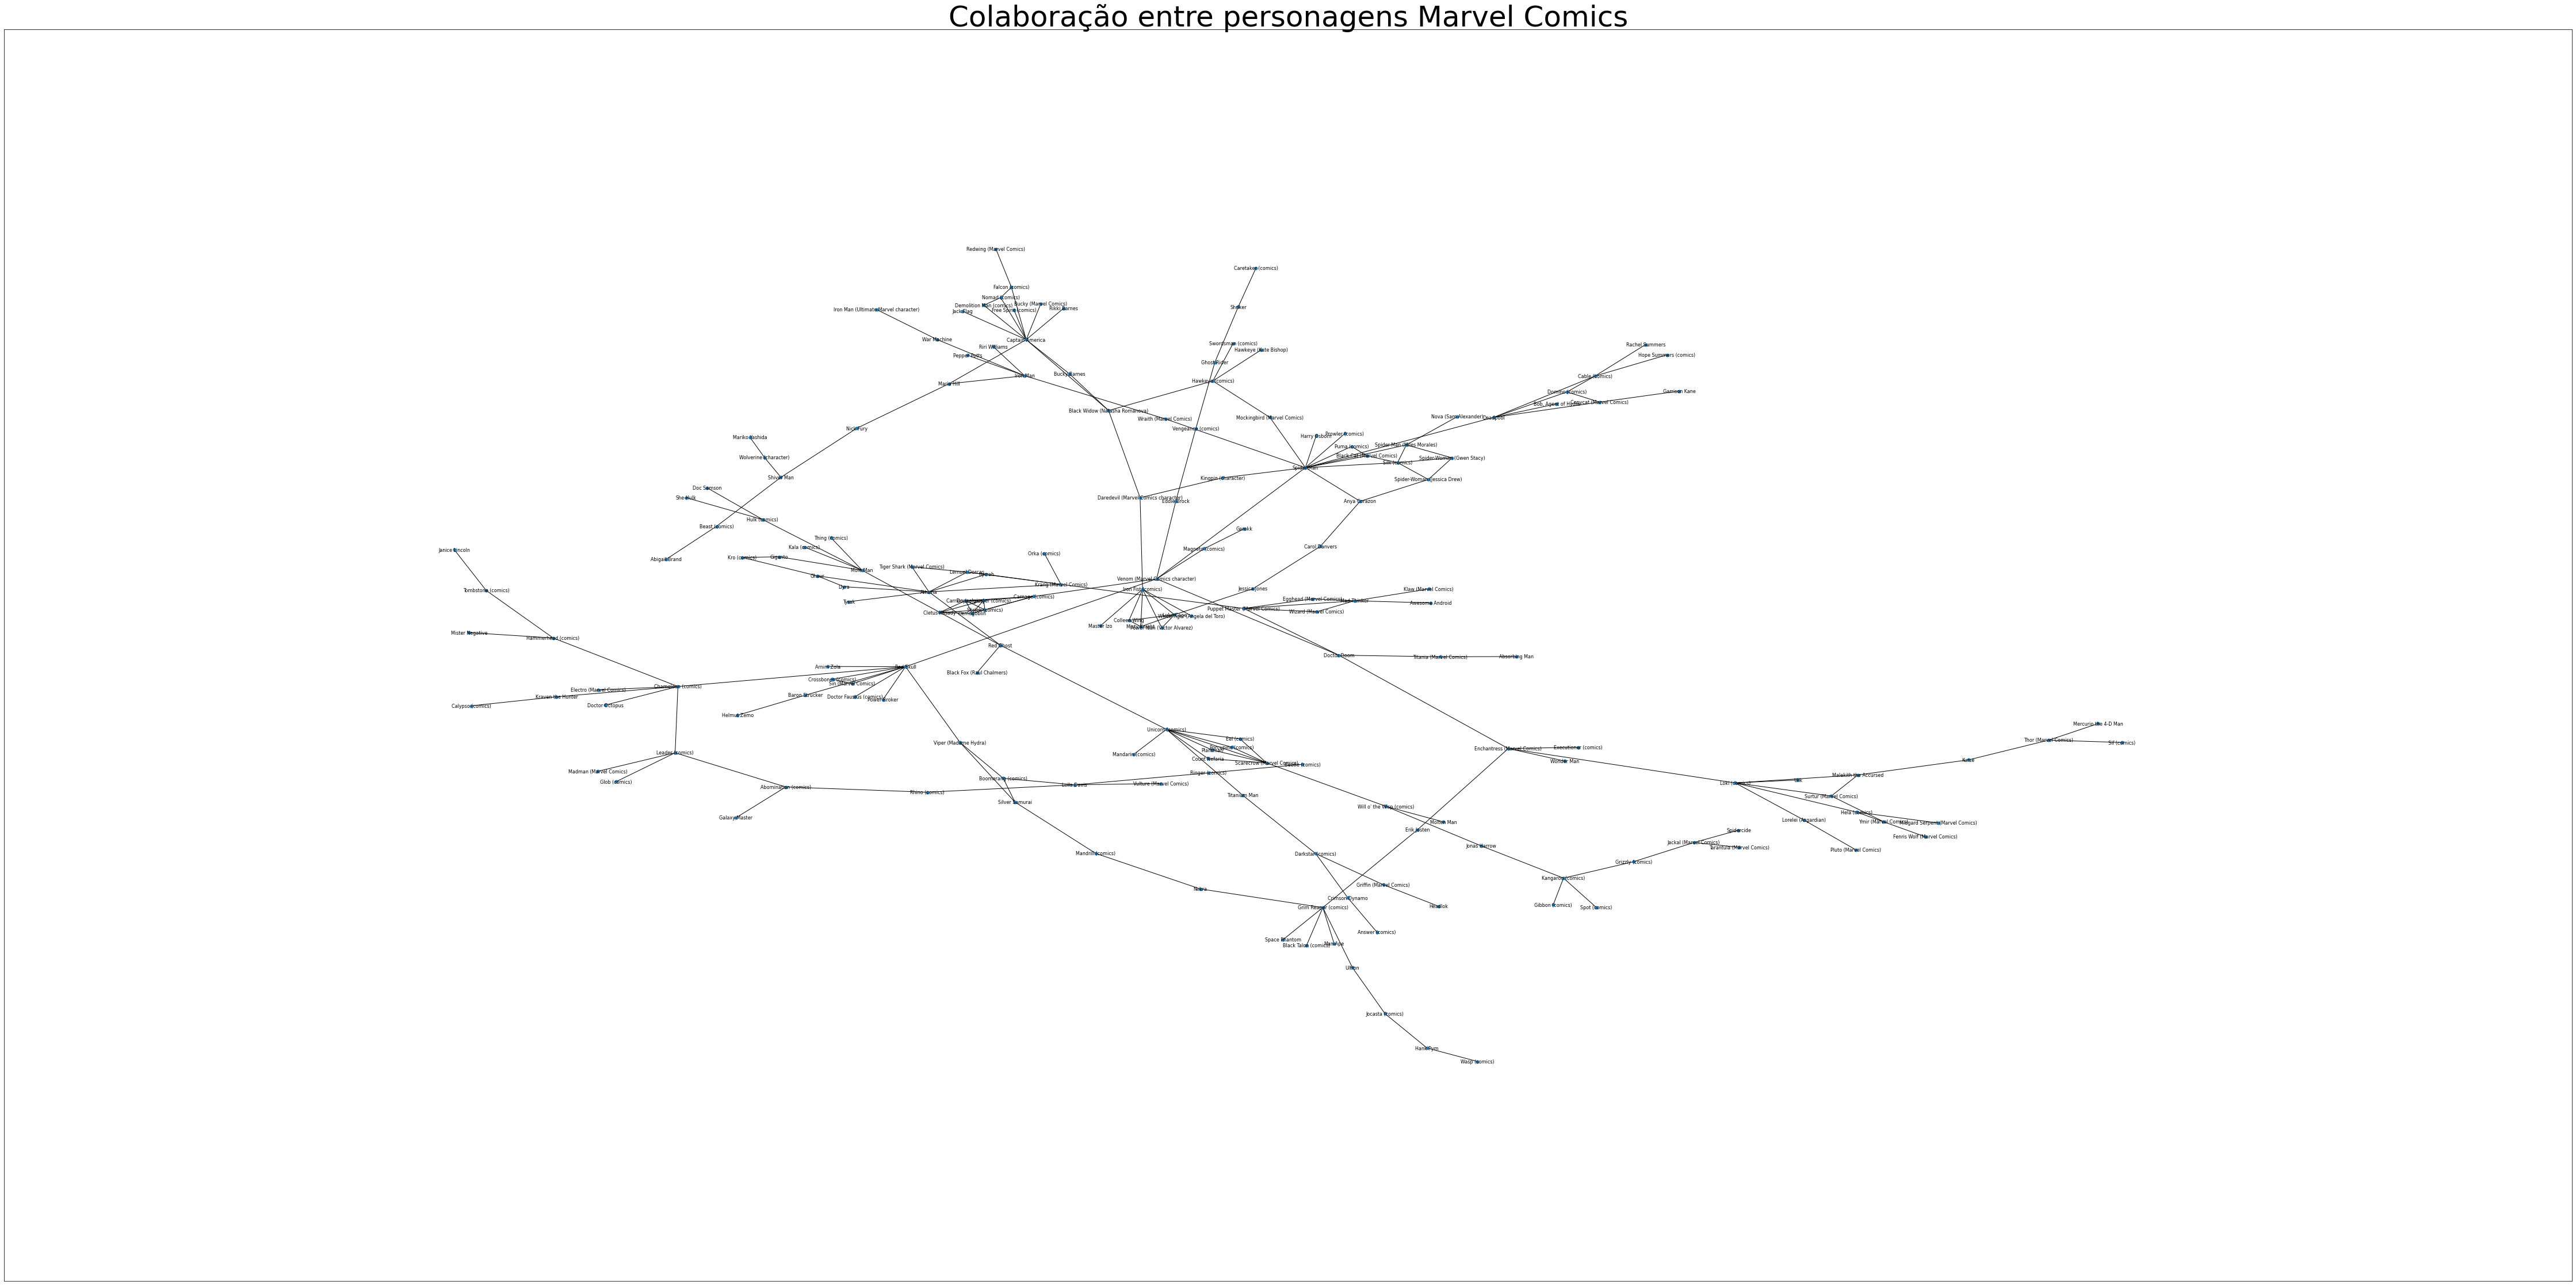

In [ ]:
color_state_map = {0: 'blue', 1: 'red', 2: 'green'}
#foi aqui definido heróis como azuis, vilões como vermelhos e anti-heróis como verdes
groups = np.random.choice([0,1,2], size=10)
nx.set_node_attributes(H, dict(zip(H.nodes(), groups)), 'group')
node_color=[color_state_map[node[1]['group']]
                    for node in H.nodes(data=True)]
pos=nx.spring_layout(H)
#tamanho da figura
plt.figure(figsize =(80, 40))
nx.draw_networkx(H, pos, with_labels=True, font_size=8, node_size=25)
#título
plt.title("Colaboração entre personagens Marvel Comics", fontsize=50)
#margens, para a questão astética
plt.gca().margins(0.2, 0.2)
create_using=nx.Graph(H)

Como esperado, os heróis (0/azul) estão muito mais conectados uns com os outros do que os vilões(1/vermelho), e o mesmo se aplica aos vilões. Os anti-heróis (2/verde) são exceção aqui se espalhando e se conectando com ambos os grupos.

##Informações iniciais relacionados aos vertices

Agora analisaremos algumas informações sobre o grafo, muitas as quais serão aprofundadas mais a frente.

Abaixo número de vertices e arestas do Grafo. Pelo número podemos inferir que a densidade do grafo é baixa.

In [ ]:
print('ordem:', G.order())
print('tamanho', G.size())

ordem: 350
tamanho 346


O subgrafo H também tem baixa densidade também, porém maior que a do grafo G já que a ordem e o tamanho não são de valores tão próximos assim.

In [ ]:
print('ordem:', H.order())
print('tamanho', H.size())

ordem: 181
tamanho 224


Abaixo está o Grau de centralidade, que informa o grau do vértice dividido pelo número de nós. Veremos mais a frente sobre outros tipos de centralidade

Aqui podemos ver os nós que mais se conectam com outros diretamente, o que é chamado de centralidade

In [ ]:
degrees = nx.degree_centrality(G)

#print cent in sorted order limit 10    
listofTuples = sorted(degrees.items() , reverse=True, key=lambda x: x[1])
for i in range(0,10):
   print(listofTuples[i][0] , ":" , listofTuples[i][1] )

Spider-Man : 0.034383954154727794
Captain America : 0.028653295128939826
Red Skull : 0.025787965616045846
Unicorn (comics) : 0.022922636103151862
Attuma : 0.022922636103151862
Iron Fist (comics) : 0.020057306590257878
Venom (Marvel Comics character) : 0.017191977077363897
Loki (comics) : 0.017191977077363897
Chameleon (comics) : 0.017191977077363897
Grim Reaper (comics) : 0.017191977077363897


Abaixo mostra a centralidade do grafo H, que manteve os principais personagens no grafo central que foi extraído.

In [ ]:
degrees = nx.degree_centrality(H)

#print cent in sorted order limit 10    
listofTuples = sorted(degrees.items() , reverse=True, key=lambda x: x[1])
for i in range(0,10):
   print(listofTuples[i][0] , ":" , listofTuples[i][1] )

Spider-Man : 0.06666666666666667
Captain America : 0.05555555555555556
Red Skull : 0.05
Unicorn (comics) : 0.044444444444444446
Attuma : 0.044444444444444446
Iron Fist (comics) : 0.03888888888888889
Venom (Marvel Comics character) : 0.03333333333333333
Loki (comics) : 0.03333333333333333
Chameleon (comics) : 0.03333333333333333
Grim Reaper (comics) : 0.03333333333333333


Podemos também usar fórmulas para calcular o diâmetro (o menor dos maiores caminhos), e o raio, que se trata do valor menor da excentricidade. Como outros tópicos, está é uma breve introdução do trabalho que faremos aqui, que terá mais detalhes será mais aprofundado, por hora é definido que o diâmetro e o raio dos vertices é infinito.

In [ ]:
if nx.is_connected(G)==True:
   print(nx.diameter(G))
else:
   print("O diâmetro do Grafo é infinito, pois é desconexo.\nO mesmo se aplica ao raio")

O diâmetro do Grafo é infinito, pois é desconexo.
O mesmo se aplica ao raio


O mesmo nâo se aplica ao grafo H, que já é conexo, logo um valor para o diâmetro pode ser definido.

In [ ]:
if nx.is_connected(H)==True:
   print(nx.diameter(H))
else:
   print("O diâmetro do Grafo é infinito, pois é desconexo.\nO mesmo se aplica ao raio")

21


A lista de adjacencia também pode ser visualizada com a função print. Mas devido ao alto número de nós deixamos como comentário, e fica por opção do visualizador remover o hashtag e printar os dados, sob risco de bugar o notebook/Google Colab pelo excesso de informação.

In [ ]:
%pip install 'scipy>=1.8'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 33.8 MB 1.6 MB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.3
    Uninstalling scipy-1.7.3:
      Successfully uninstalled scipy-1.7.3


In [ ]:
#A=nx.adjacency_matrix(H)
#print(A)

Podemos implementar algoritmos de busca a fim de extrair informações do Grafo. Por exemplo, descobrir quais conexões o Barão Zemo, personagem de Capitão America, faz com outros personagens. Isso gera um Grafo direcionado para "fora" do vértice que representa o Barão.

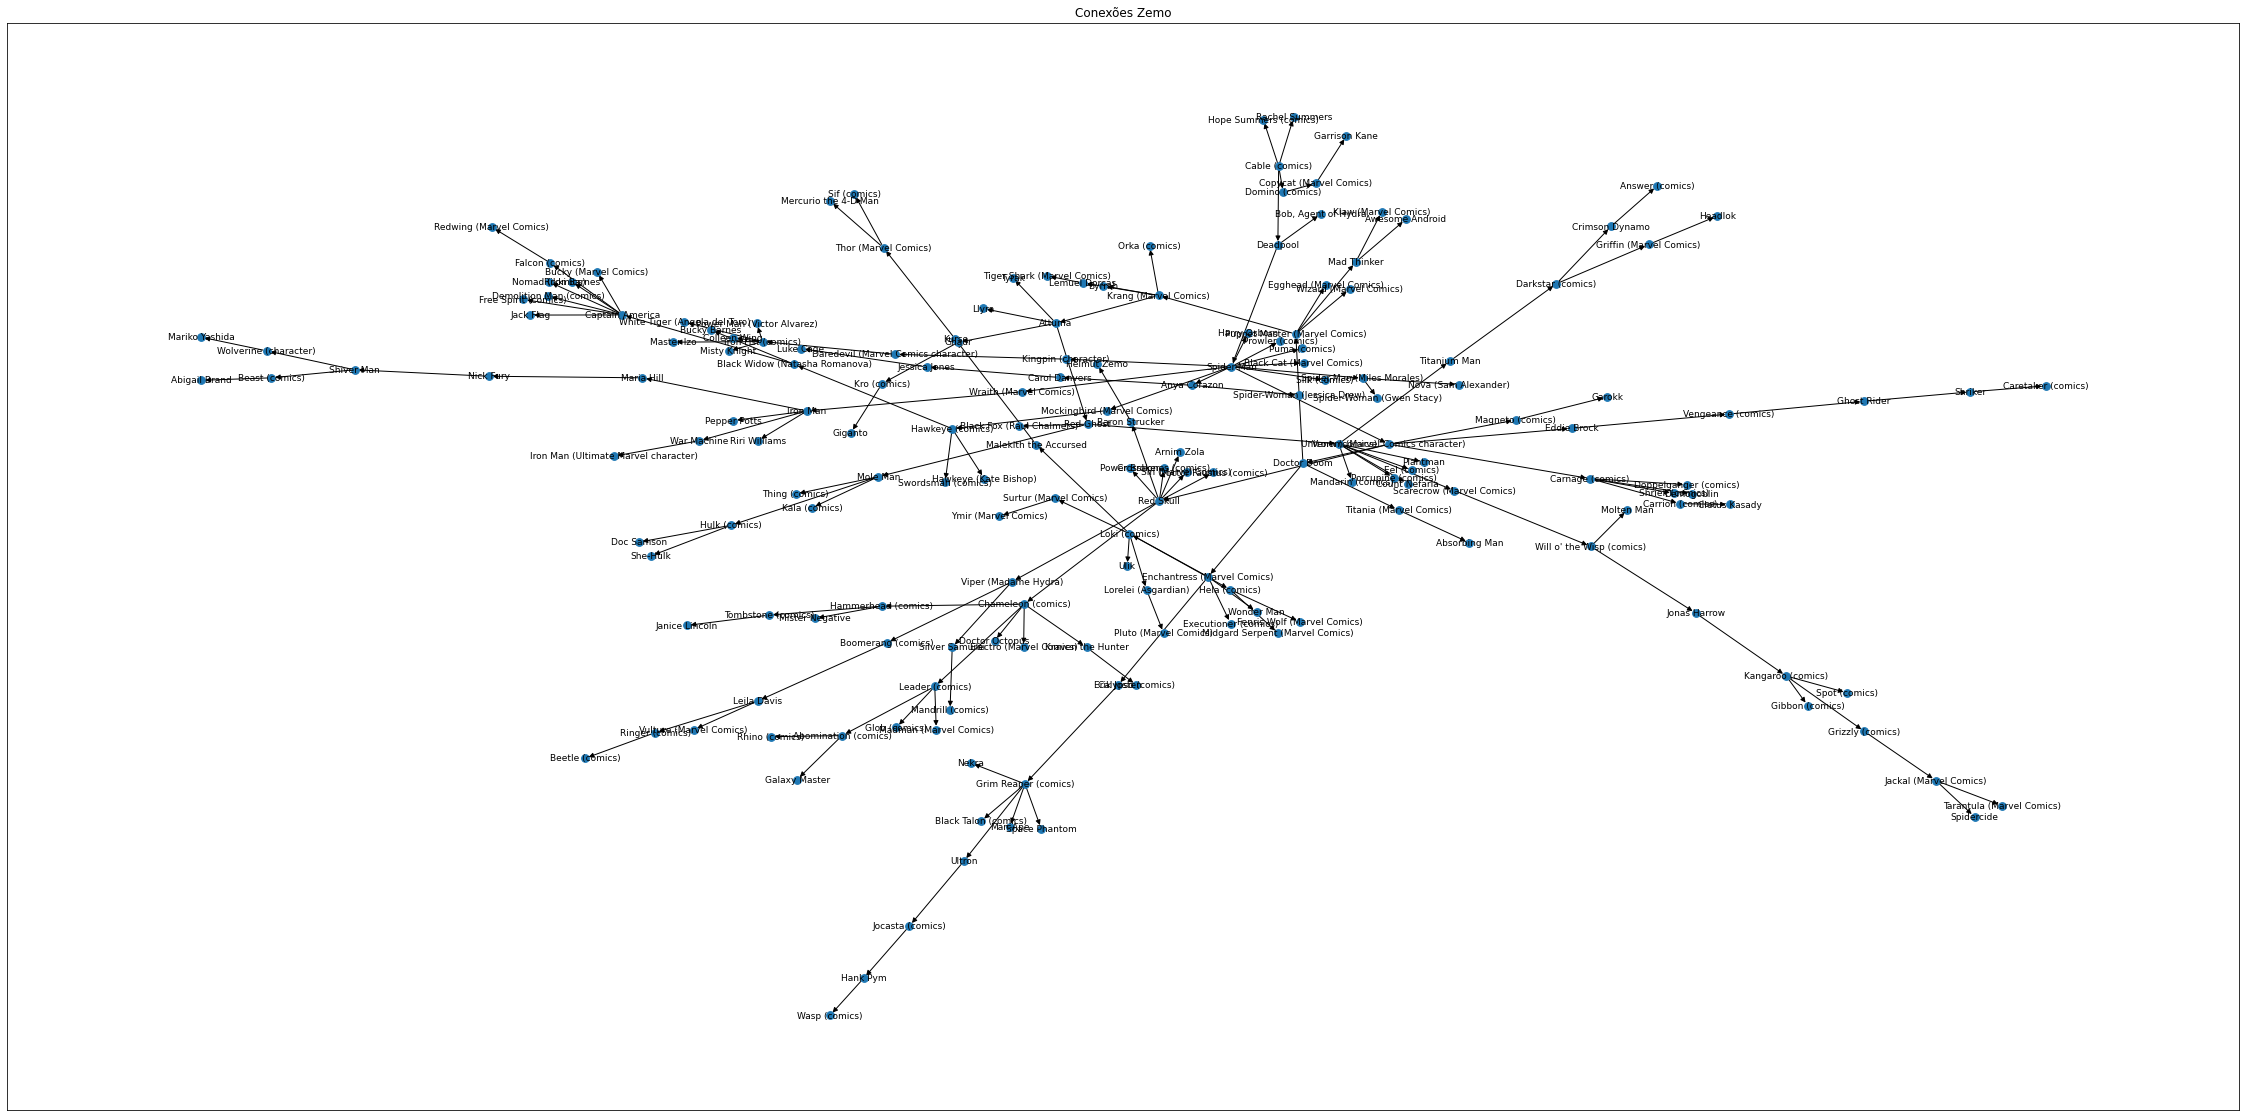

In [ ]:
conexao = nx.bfs_tree(G, 'Cable (comics)')
plt.figure(figsize=(40, 20))
plt.title('Conexões Zemo')
pos=nx.spring_layout(G)
nx.draw_networkx(conexao, pos, with_labels=True, node_size=60, font_size=9)

In [ ]:
print('Conexões:', list(conexao))

Conexões: ['Baron Zemo', 'Blackout (Marcus Daniels)', 'Vermin (comics)']


Podemos também analisar a partir de um nó, com algoritmos de busca em largura que localizam os sucessores do nó em questão, porém com apenas um caminho entre dois quaisquer, criando uma 'arvore'. Vamos mostrar isso com a mutante Siryn.

In [ ]:

#codigo para listar os sucessores de Siryn
As=list(nx.bfs_tree(G, 'Siryn').edges())
As

[('Siryn', 'Black Tom Cassidy'),
 ('Siryn', 'Juggernaut (comics)'),
 ('Black Tom Cassidy', 'Mondo (comics)'),
 ('Juggernaut (comics)', 'Cyttorak')]

In [ ]:
print(dict(nx.bfs_successors(G, 'Siryn')))

{'Siryn': ['Black Tom Cassidy', 'Juggernaut (comics)'], 'Black Tom Cassidy': ['Mondo (comics)'], 'Juggernaut (comics)': ['Cyttorak']}


In [ ]:
import pydotplus
from networkx.drawing.nx_pydot import graphviz_layout

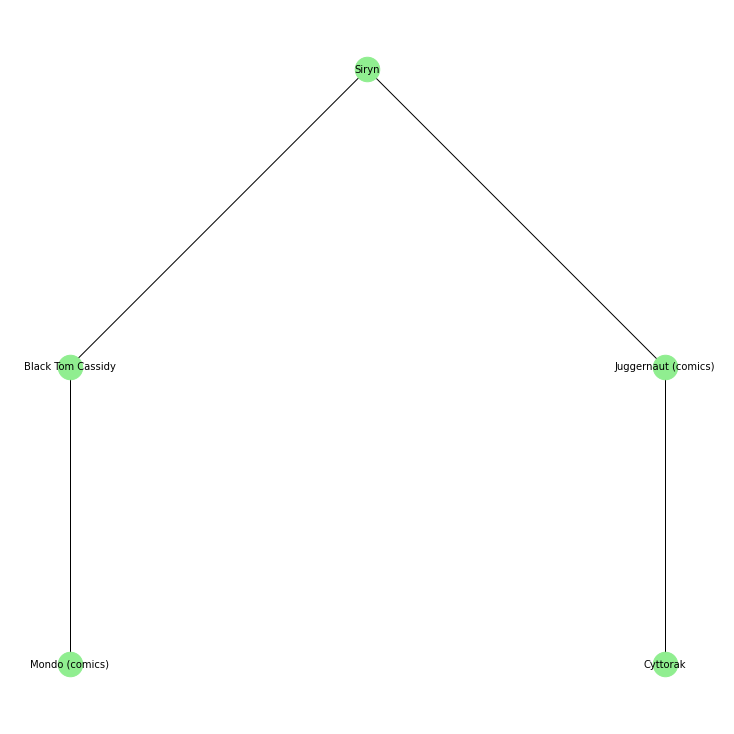

In [ ]:
J = nx.Graph()
J.add_edges_from(As)

plt.figure(figsize=(10, 10))

pos = graphviz_layout(J, prog='dot')

nx.draw(J, pos, with_labels=True, font_size=10, node_size=600, node_color='lightgreen')

In [ ]:
print(nx.is_tree(J))

True


Aqui vemos a Syrin no topo da árvore, os sucessores dela logo abaixo, e os sucessores dos mesmo abaixo também.

Outro exemplo de grafo com a personagem Hope Summers

Primeiro printamos uma lista com sucessores dela, e sucessores destes, pois desta vez não adicionaremos rótulos aos vertices, a fim de dar utilidade à lista.

In [ ]:
lista_hope=dict(nx.bfs_successors(G, 'Hope Summers (comics)'))
lista_hope

{'Hope Summers (comics)': ['Cable (comics)'],
 'Cable (comics)': ['Domino (comics)', 'Rachel Summers', 'Deadpool'],
 'Domino (comics)': ['Copycat (Marvel Comics)'],
 'Deadpool': ['Bob, Agent of Hydra', 'Spider-Man'],
 'Copycat (Marvel Comics)': ['Garrison Kane'],
 'Spider-Man': ['Venom (Marvel Comics character)',
  'Anya Corazon',
  'Spider-Man (Miles Morales)',
  'Prowler (comics)',
  'Harry Osborn',
  'Mockingbird (Marvel Comics)',
  'Wraith (Marvel Comics)',
  'Puma (comics)',
  'Black Cat (Marvel Comics)',
  'Kingpin (character)',
  'Silk (comics)'],
 'Venom (Marvel Comics character)': ['Carnage (comics)',
  'Doctor Doom',
  'Magneto (comics)',
  'Red Skull',
  'Eddie Brock'],
 'Anya Corazon': ['Spider-Woman (Jessica Drew)', 'Carol Danvers'],
 'Spider-Man (Miles Morales)': ['Nova (Sam Alexander)',
  'Spider-Woman (Gwen Stacy)'],
 'Mockingbird (Marvel Comics)': ['Hawkeye (comics)'],
 'Wraith (Marvel Comics)': ['Iron Man'],
 'Kingpin (character)': ['Daredevil (Marvel Comics character

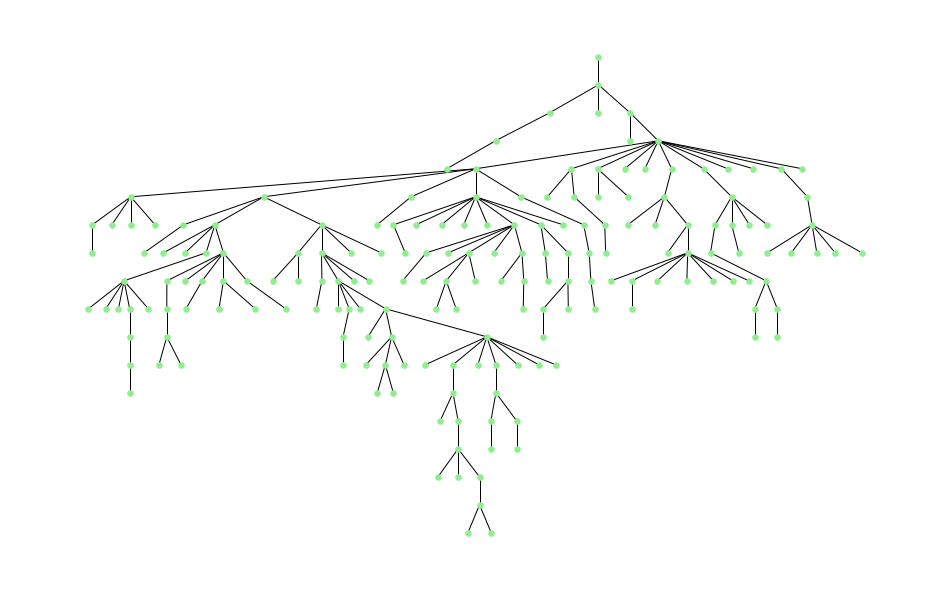

In [ ]:
Bs=list(nx.bfs_tree(G, 'Hope Summers (comics)').edges())
Bs
H = nx.Graph()

H.add_edges_from(Bs)

plt.figure(figsize=(13, 8))

pos = graphviz_layout(H, prog='dot')

nx.draw(H, pos, with_labels=False, font_size=5, node_size=30, node_color='lightgreen')

Nesse caso a lista é bem extensa, e há relativamente muitos galhos no grafo gerado, por isso é sempre preferível adicionar rótulos aos vertices. Mas caso sejam rotulos que não são facilmente lidos na imagem pode-se usar a lista para ler árvores de porte menor.
podemos usa-lá para listar todos os vértices diretamente ou indiretamente conectados á Hope, desde que a estrutura seja acíclica, e apontar os caminhos mais rápidos entre ela e quaisquer um dos vértices que serão apresentados.

In [ ]:

#podemos ver que G não é um grafo to tipo árvore
nx.is_tree(G)

False

In [ ]:
#Já o grafo H é uma árvore, e pelo tamanho da árvore gerada pode-se assumir que Hope Summers faz parte de H
nx.is_tree(H)

True

Mesmo não sendo uma árvore, ele ainda contém árvores em si. Porém muitos subgrafos não contém, como os que tem apenas 1 ou 2 arestas.

## Métricas e relações dos componetes para com grafo e seus elementos

**Centralidades**



> Centralidade grau de vértices


Conta quantas ligações um vértice faz, e divide pelo número de vertices menos 1, sendo assim relativa ao grafo.

In [ ]:
#aqui podemos printar a centralidade de cada um dos vertices
centrality = nx.degree_centrality(H)

print(centrality)

{'Hope Summers (comics)': 0.005555555555555556, 'Cable (comics)': 0.022222222222222223, 'Domino (comics)': 0.011111111111111112, 'Rachel Summers': 0.005555555555555556, 'Deadpool': 0.016666666666666666, 'Copycat (Marvel Comics)': 0.011111111111111112, 'Bob, Agent of Hydra': 0.005555555555555556, 'Spider-Man': 0.06666666666666667, 'Garrison Kane': 0.005555555555555556, 'Venom (Marvel Comics character)': 0.03333333333333333, 'Anya Corazon': 0.016666666666666666, 'Spider-Man (Miles Morales)': 0.016666666666666666, 'Prowler (comics)': 0.005555555555555556, 'Harry Osborn': 0.005555555555555556, 'Mockingbird (Marvel Comics)': 0.011111111111111112, 'Wraith (Marvel Comics)': 0.011111111111111112, 'Puma (comics)': 0.005555555555555556, 'Black Cat (Marvel Comics)': 0.005555555555555556, 'Kingpin (character)': 0.011111111111111112, 'Silk (comics)': 0.005555555555555556, 'Carnage (comics)': 0.02777777777777778, 'Doctor Doom': 0.022222222222222223, 'Magneto (comics)': 0.011111111111111112, 'Red Sku

In [ ]:
#Graus de centralidade da personagem Hope Summers, dos X-Men
print(centrality['Hope Summers (comics)'])
#arredondando;
print(round(centrality['Hope Summers (comics)'],4))
#Esse código para arrendodamento para números muito grandes
print(round(max(centrality.values()), 5))

0.005555555555555556
0.0056
0.06667


In [ ]:
#Podemos também localizar os vértices de maior centralidade em H e seus valores

In [ ]:
centrality_sorted = ((sorted(centrality.items(), key=lambda item: item[1],reverse=True)))
print(centrality_sorted[0][0]) # vertice com maior centralidade de grau [relativa]
print(centrality_sorted[0][1]) # valor da maior centralidade de grau [relativa]

Spider-Man
0.06666666666666667


In [ ]:
centrality_sorted = ((sorted(centrality.items(), key=lambda item: item[1],reverse=False)))
print(centrality_sorted[0][0]) # vertice com menor centralidade de grau [relativa]
print(centrality_sorted[0][1]) # valor da menor centralidade de grau [relativa]

Hope Summers (comics)
0.005555555555555556


Homem-Aranha, como personagem mais popular da Marvel e um dos mais antigos (1962) tem aqui o maior número de conexões, visto que por sua popularidade há diversas revistas em que ele colabora com outros personagens ou enfrenta vilões fora de seu núcleo.

In [ ]:
print('maior grau centr. valor:', round(max(centrality.values()), 5))
print('menor grau centr. valor:', round(min(centrality.values()), 5))

maior grau centr. valor: 0.06667
menor grau centr. valor: 0.00556


Já a personagem Hope Summers foi escolhida dentre muitos vértices de mesmo grau e foi uma escolha ideal, já que a personagem não é tão popular como Homem-Aranha e sua criação é bem mais recente, 2008, não participando de muitas histórias fora do núcleo dos X-Men.

Abaixo representações da distribuição de centralidade de grau no grafo H

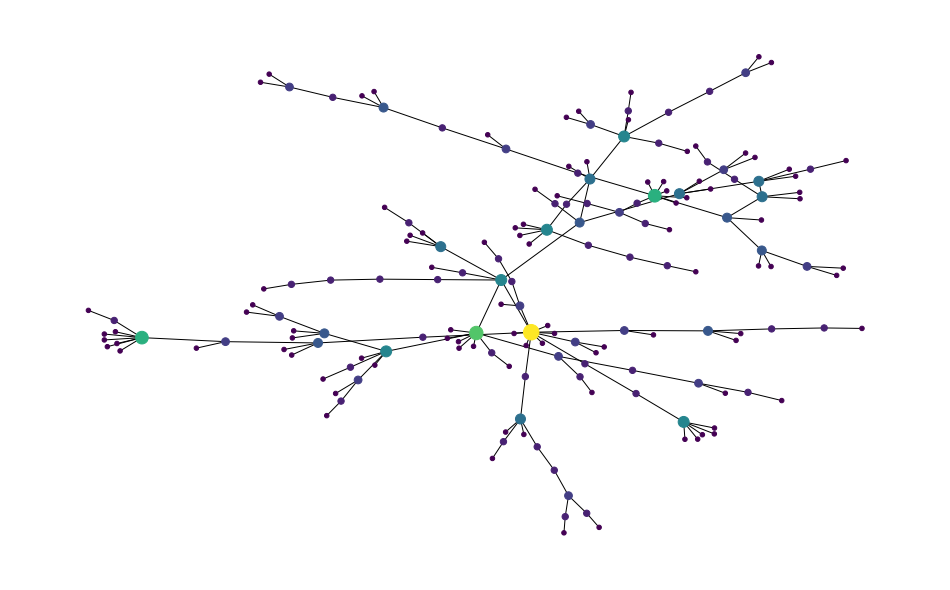

In [ ]:
# centralidade relativa de grau

cores = [centrality[id] for id in H]
tamanhos = [20 * H.degree(id) for id in H]

rotulo = {}
for id in H.nodes():
  rotulo[id] = round(centrality[id], 3)

pos = nx.spring_layout(H)

plt.figure(figsize =(13, 8))

A = nx.draw(H, pos, node_size = tamanhos, node_color = cores)

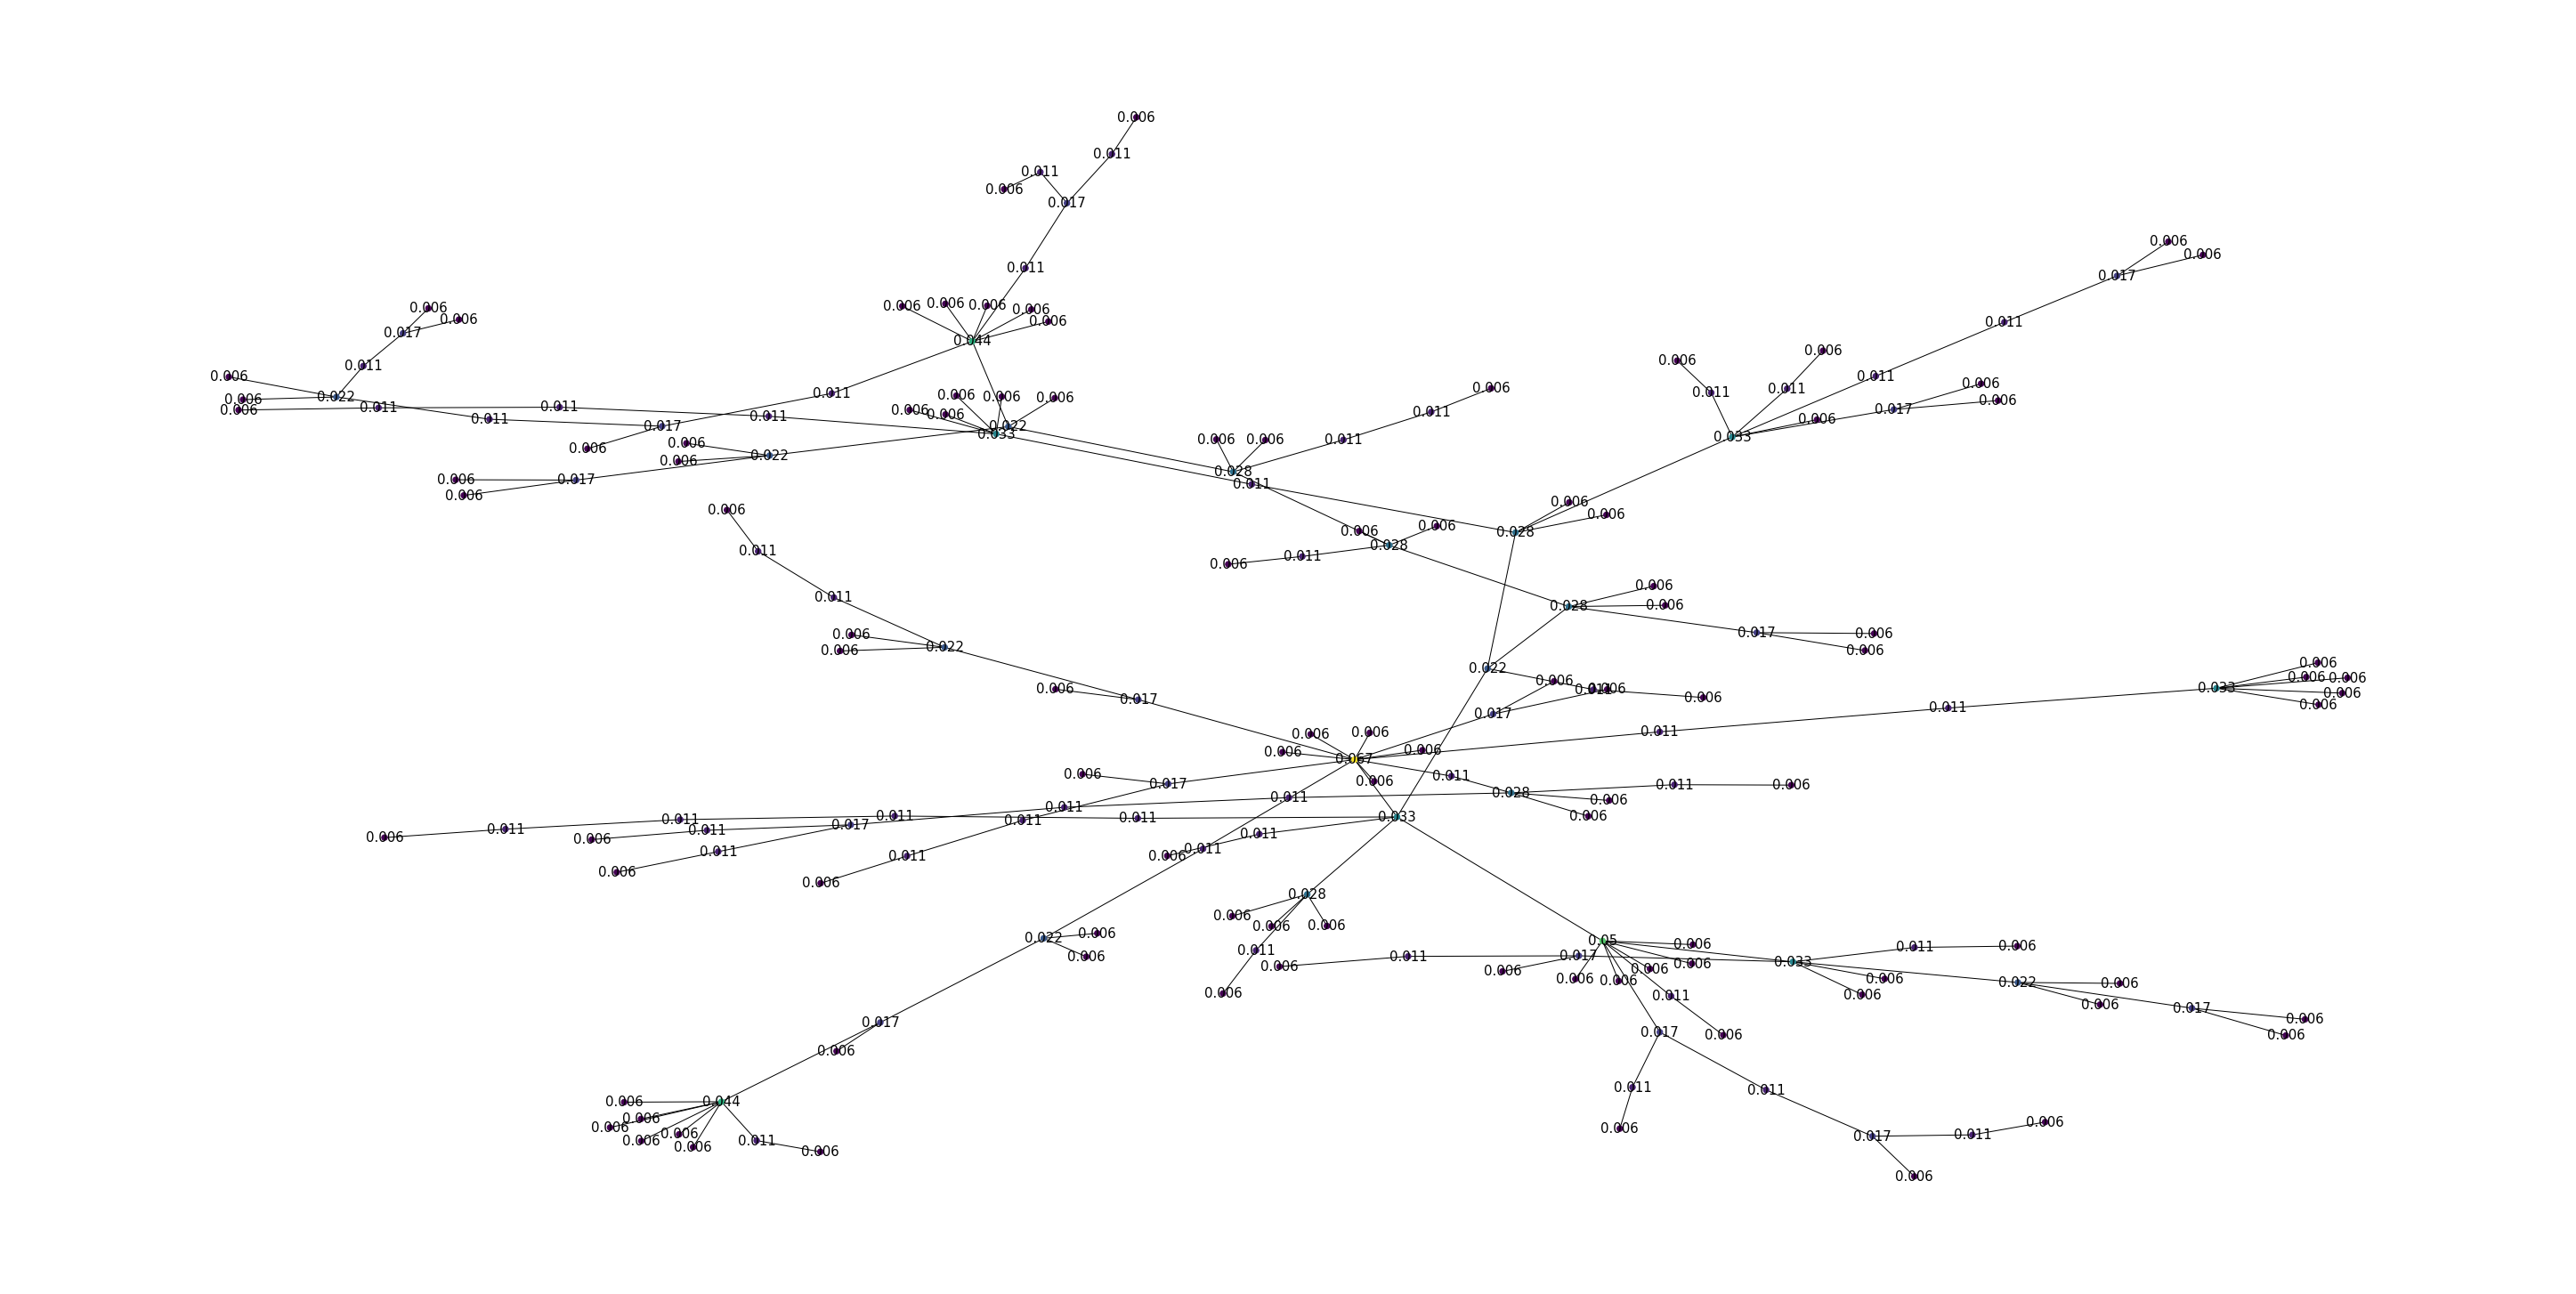

In [ ]:
cores = [centrality[id] for id in H]
tamanhos = [20 * H.degree(id) for id in H]

rotulo = {}
for id in H.nodes():
  rotulo[id] = round(centrality[id], 3)

pos = nx.spring_layout(H)
plt.figure(figsize =(40, 20))


nx.draw(H, pos, node_size = 40, node_color = cores)
nx.draw_networkx_labels(H, pos, rotulo, font_weight = 'light', font_size=15, font_color = 'black');

Devido ao grande número de vertices, foi gerada uma imagem grande para que se possa ver a centralidade dos vertices.

Obs: Devido ao alto número de nós, se torna complicado analisar as centralidades por meio de gráficos. Por isso podemos utilizar uma barra de cores para apontar os aproximados valores de cada nó

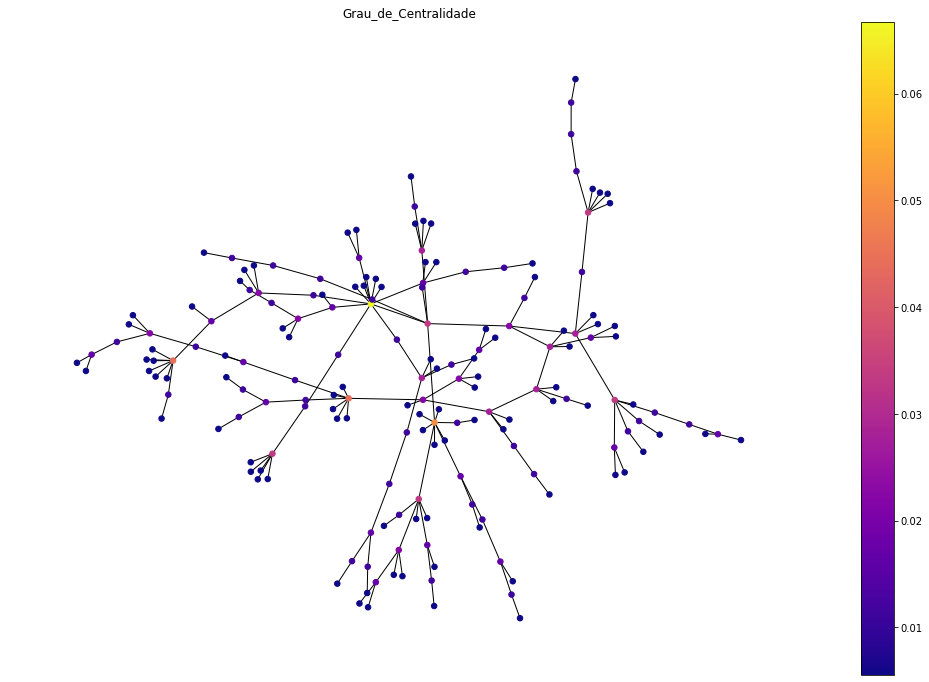

In [ ]:
def draw(H, pos, centrality, Grau_de_Centralidade):
    
     nodes = nx.draw_networkx_nodes(H, pos, node_size=30, cmap=plt.cm.plasma,
                                   node_color=list(centrality.values()),
                                   nodelist=centrality.keys())
   
     edges = nx.draw_networkx_edges(H, pos)

     plt.title(Grau_de_Centralidade)
     plt.colorbar(nodes)
     plt.axis('off')
     plt.show()
  
     
pos = nx.spring_layout(H, seed=60)
plt.figure(figsize=(18, 12))
draw(H, pos, centrality, 'Grau_de_Centralidade')


Repetiremos esse processo com outras medidas de centralidade.



>CENTRALIDADE DE PROXIMIDADE RELATIVA

A centralidade de proximidade classifica um vértices com base em sua proximidade com todos os outros vértices da rede. É então calculado os caminhos mais curtos entre todos os eles e um valor é dado a cada um com base na soma dos caminhos mais curtos.

In [ ]:
prox_centrality = nx.closeness_centrality(H)

print(prox_centrality)

{'Hope Summers (comics)': 0.12640449438202248, 'Cable (comics)': 0.14457831325301204, 'Domino (comics)': 0.1267605633802817, 'Rachel Summers': 0.12640449438202248, 'Deadpool': 0.16728624535315986, 'Copycat (Marvel Comics)': 0.11271133375078271, 'Bob, Agent of Hydra': 0.14342629482071714, 'Spider-Man': 0.19758507135016465, 'Garrison Kane': 0.10135135135135136, 'Venom (Marvel Comics character)': 0.2127659574468085, 'Anya Corazon': 0.16635859519408502, 'Spider-Man (Miles Morales)': 0.16574585635359115, 'Prowler (comics)': 0.1651376146788991, 'Harry Osborn': 0.1651376146788991, 'Mockingbird (Marvel Comics)': 0.1694915254237288, 'Wraith (Marvel Comics)': 0.16885553470919323, 'Puma (comics)': 0.1651376146788991, 'Black Cat (Marvel Comics)': 0.1651376146788991, 'Kingpin (character)': 0.16728624535315986, 'Silk (comics)': 0.1651376146788991, 'Carnage (comics)': 0.17733990147783252, 'Doctor Doom': 0.2066590126291619, 'Magneto (comics)': 0.17595307917888564, 'Red Skull': 0.18652849740932642, 'Ed

In [ ]:
centrality_sorted = ((sorted(prox_centrality.items(), key=lambda item: item[1],reverse=True)))
print(centrality_sorted[0][0]) # vertice com maior centralidade de grau [relativa]
print(centrality_sorted[0][1]) # valor da maior centralidade de grau [relativa]

Venom (Marvel Comics character)
0.2127659574468085


In [ ]:
centrality_sorted = ((sorted(prox_centrality.items(), key=lambda item: item[1],reverse=False)))
print(centrality_sorted[0][0]) # vertice com menor centralidade de proximidade[relativa]
print(centrality_sorted[0][1]) # valor da menor centralidade de proximidade [relativa]

Spidercide
0.06941766293868107


Venom também é um personagem bastante popular, ganhando até um filme que se tornou sucesso em bilheterias. Ele não é tão popular quanto Homem-Araha a ponto de ter diversas revistas solo mas é o bastante para fazer participações nas revistas de outros personagens, fazendo sentido que não tenha tantas conexões mas se encontre em uma posição próxima á de vários personagens.
Caso ele fosse um mensageiro, as informaçoes levaria mais tempo para que as informações chegassem a outros personagens se ele fosse removido.

In [ ]:
colores = [prox_centrality[id] for id in H]
tamanhos = [20 * G.degree(id) for id in H]

In [ ]:
rotulo = {}
for id in H.nodes():
  rotulo[id] = round(prox_centrality[id], 3)

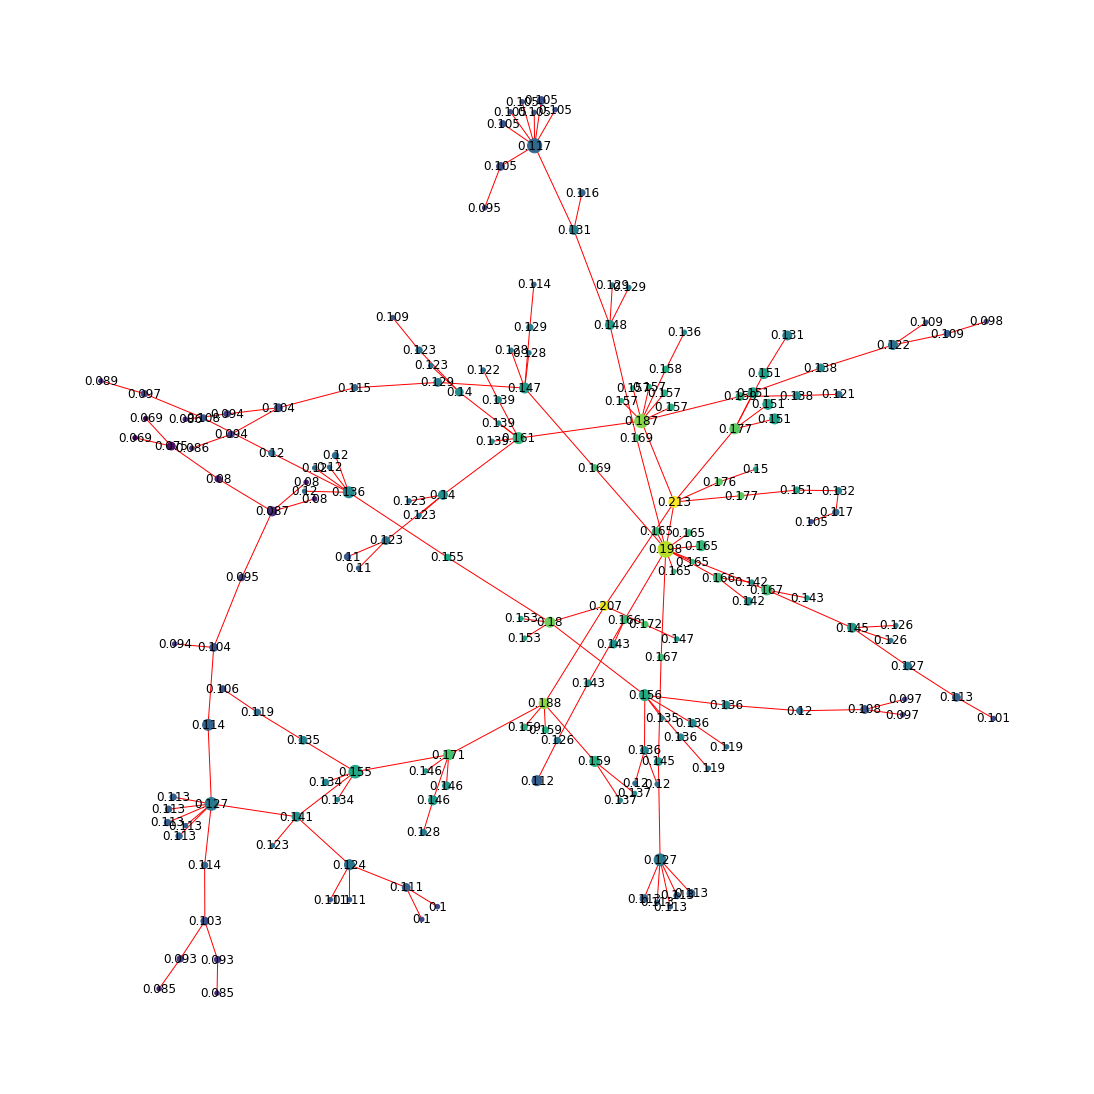

In [ ]:
pos = nx.spring_layout(H)
plt.figure(figsize =(15, 15))
nx.draw(H, pos, node_size = tamanhos, node_color = colores, edge_color='red')
nx.draw_networkx_labels(H, pos, rotulo, font_weight = 'light', font_color = 'black');

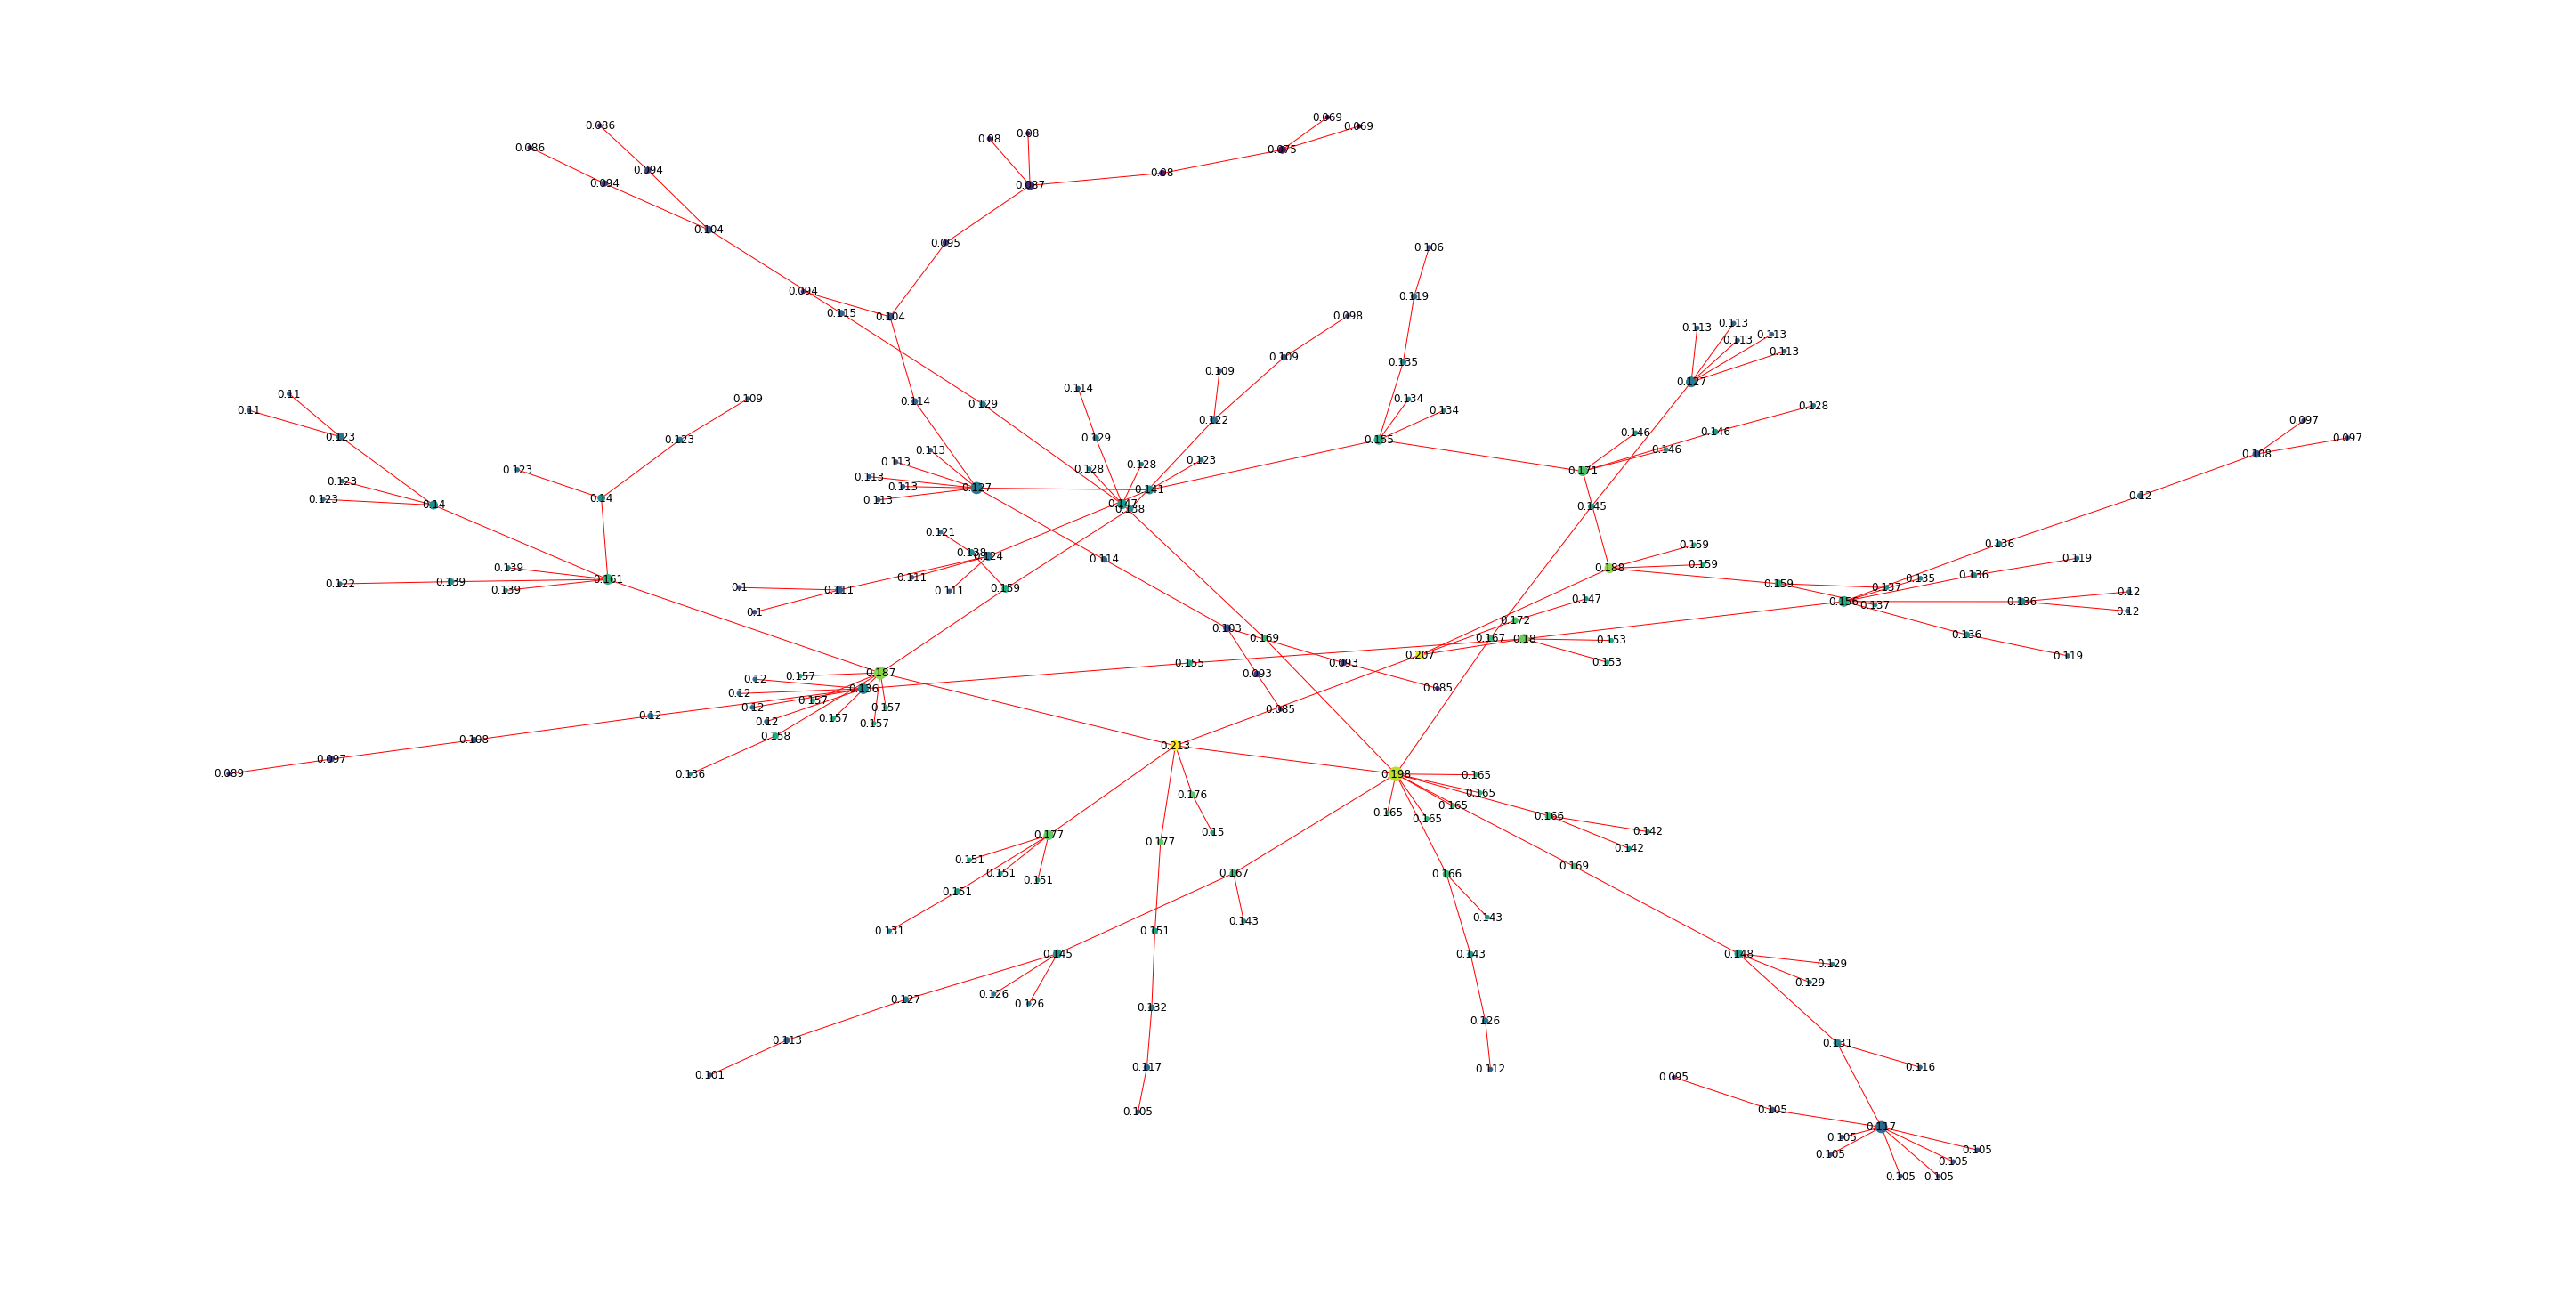

In [ ]:
colores = [prox_centrality[id] for id in H]
tamanhos = [20 * H.degree(id) for id in H]

rotulo = {}
for id in H.nodes():
  rotulo[id] = round(prox_centrality[id], 3)

pos = nx.spring_layout(H)
plt.figure(figsize =(40, 20))
nx.draw(H, pos, node_size = tamanhos, node_color = colores, edge_color='red')
nx.draw_networkx_labels(H, pos, rotulo, font_weight = 'light', font_color = 'black');

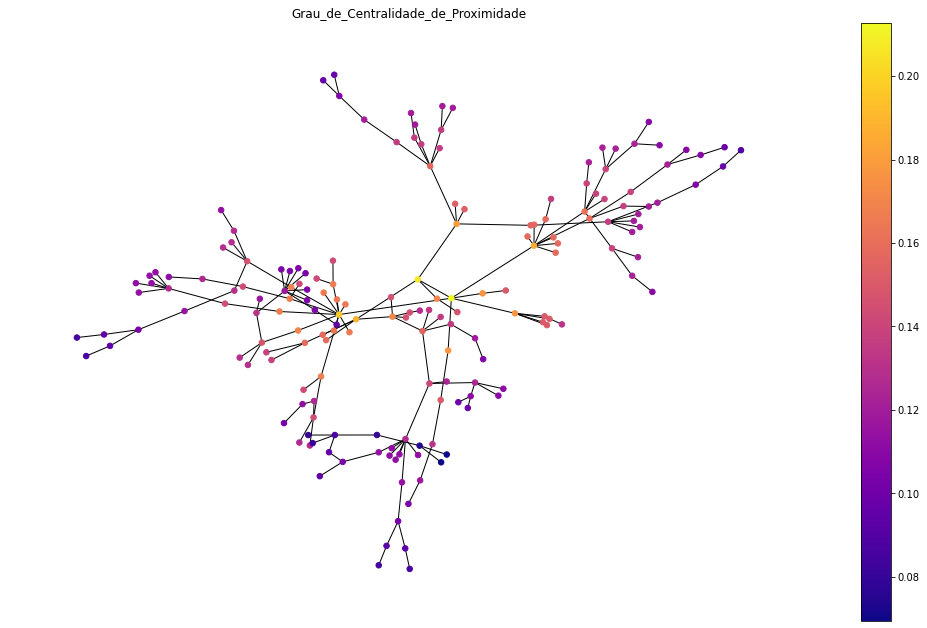

In [ ]:
def draw(H, pos, prox_centrality, Grau_de_Centralidade_de_Proximidade):
    
     nodes = nx.draw_networkx_nodes(H, pos, node_size=30, cmap=plt.cm.plasma,
                                   node_color=list(prox_centrality.values()),
                                   nodelist=prox_centrality.keys())
   
     edges = nx.draw_networkx_edges(H, pos)

     plt.title(Grau_de_Centralidade_de_Proximidade)
     plt.colorbar(nodes)
     plt.axis('off')
     plt.show()
pos = nx.spring_layout(G, seed=60)

plt.figure(figsize=(18, 11))
draw(H, pos, prox_centrality, 'Grau_de_Centralidade_de_Proximidade')

>CENTRALIDADE DE intermediação (Relativa)

A centralidade de intermediação mede o número de vezes que um vértice está no caminho mais curto entre outros vértices, nos mostrando quais deles são 'pontes' em uma rede. É definido a partir de todos os caminhos mínimos, e a partir, conta quantas vezes um vértice específico faz parte de caminhos.

In [ ]:
inter = nx.betweenness_centrality(H)

print(inter)

{'Hope Summers (comics)': 0.0, 'Cable (comics)': 0.05474860335195531, 'Domino (comics)': 0.022098075729360647, 'Rachel Summers': 0.0, 'Deadpool': 0.0755431409062694, 'Copycat (Marvel Comics)': 0.011111111111111112, 'Bob, Agent of Hydra': 0.0, 'Spider-Man': 0.5186219739292365, 'Garrison Kane': 0.0, 'Venom (Marvel Comics character)': 0.6805090006207325, 'Anya Corazon': 0.04388578522656735, 'Spider-Man (Miles Morales)': 0.022160148975791435, 'Prowler (comics)': 0.0, 'Harry Osborn': 0.0, 'Mockingbird (Marvel Comics)': 0.1442582247051521, 'Wraith (Marvel Comics)': 0.12513966480446928, 'Puma (comics)': 0.0, 'Black Cat (Marvel Comics)': 0.0, 'Kingpin (character)': 0.07517070142768467, 'Silk (comics)': 0.0, 'Carnage (comics)': 0.05487274984481689, 'Doctor Doom': 0.5820608317815021, 'Magneto (comics)': 0.011111111111111112, 'Red Skull': 0.29801365611421476, 'Eddie Brock': 0.04369956548727499, 'Spider-Woman (Jessica Drew)': 0.0, 'Carol Danvers': 0.022098075729360647, 'Nova (Sam Alexander)': 0.0,

In [ ]:
centrality_sorted = ((sorted(inter.items(), key=lambda item: item[1],reverse=True)))
print(centrality_sorted[0][0]) # vertice com maior centralidade de intermediaçao [relativa]
print(centrality_sorted[0][1]) # valor da maior centralidade de intermediaçao [relativa]

Venom (Marvel Comics character)
0.6805090006207325


In [ ]:
centrality_sorted = ((sorted(inter.items(), key=lambda item: item[1],reverse=False)))
print(centrality_sorted[0][0]) # vertice com menor centralidade de intermediaçao [relativa]
print(centrality_sorted[0][1]) # valor da menor centralidade de intermediaçao [relativa]

Hope Summers (comics)
0.0


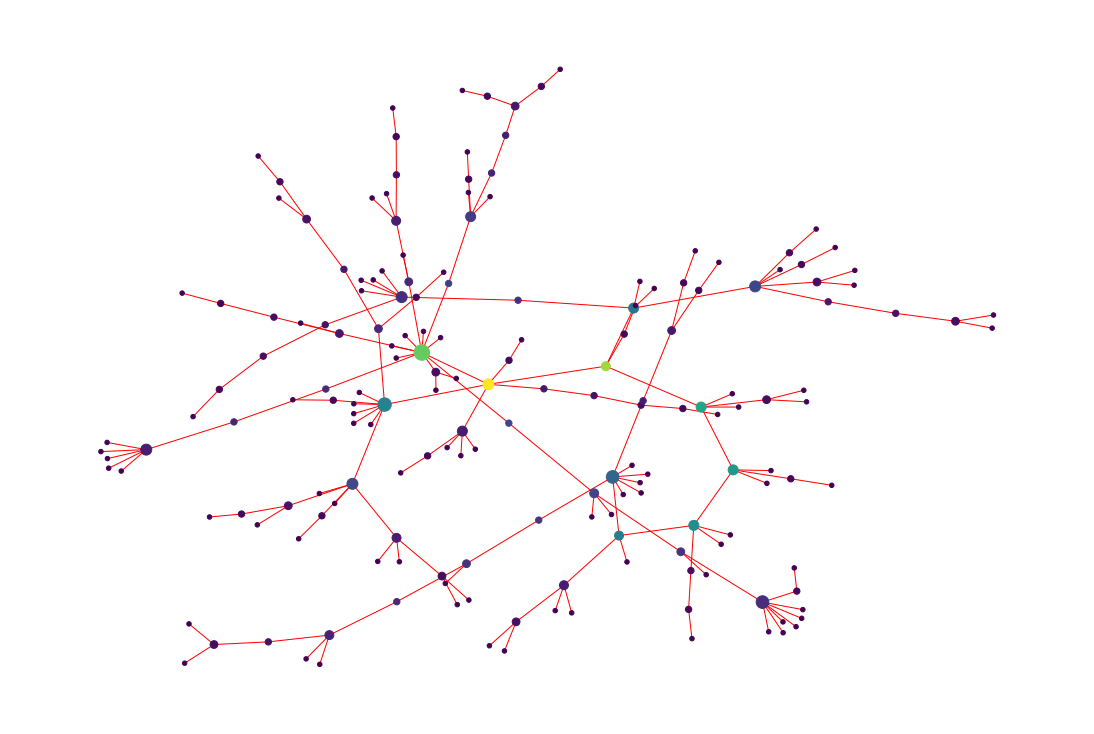

In [ ]:
cor = [inter[id] for id in H]
tamanhos = [20 * H.degree(id) for id in H]

rotulo = {}
for id in H.nodes():
  rotulo[id] = round(inter[id], 3)

pos = nx.spring_layout(H)
plt.figure(figsize =(15, 10))
nx.draw(H, pos, node_size = tamanhos, node_color = cor, edge_color='red')
#nx.draw_networkx_labels(G, pos, rotulo, font_weight = 'light', font_color = 'black');

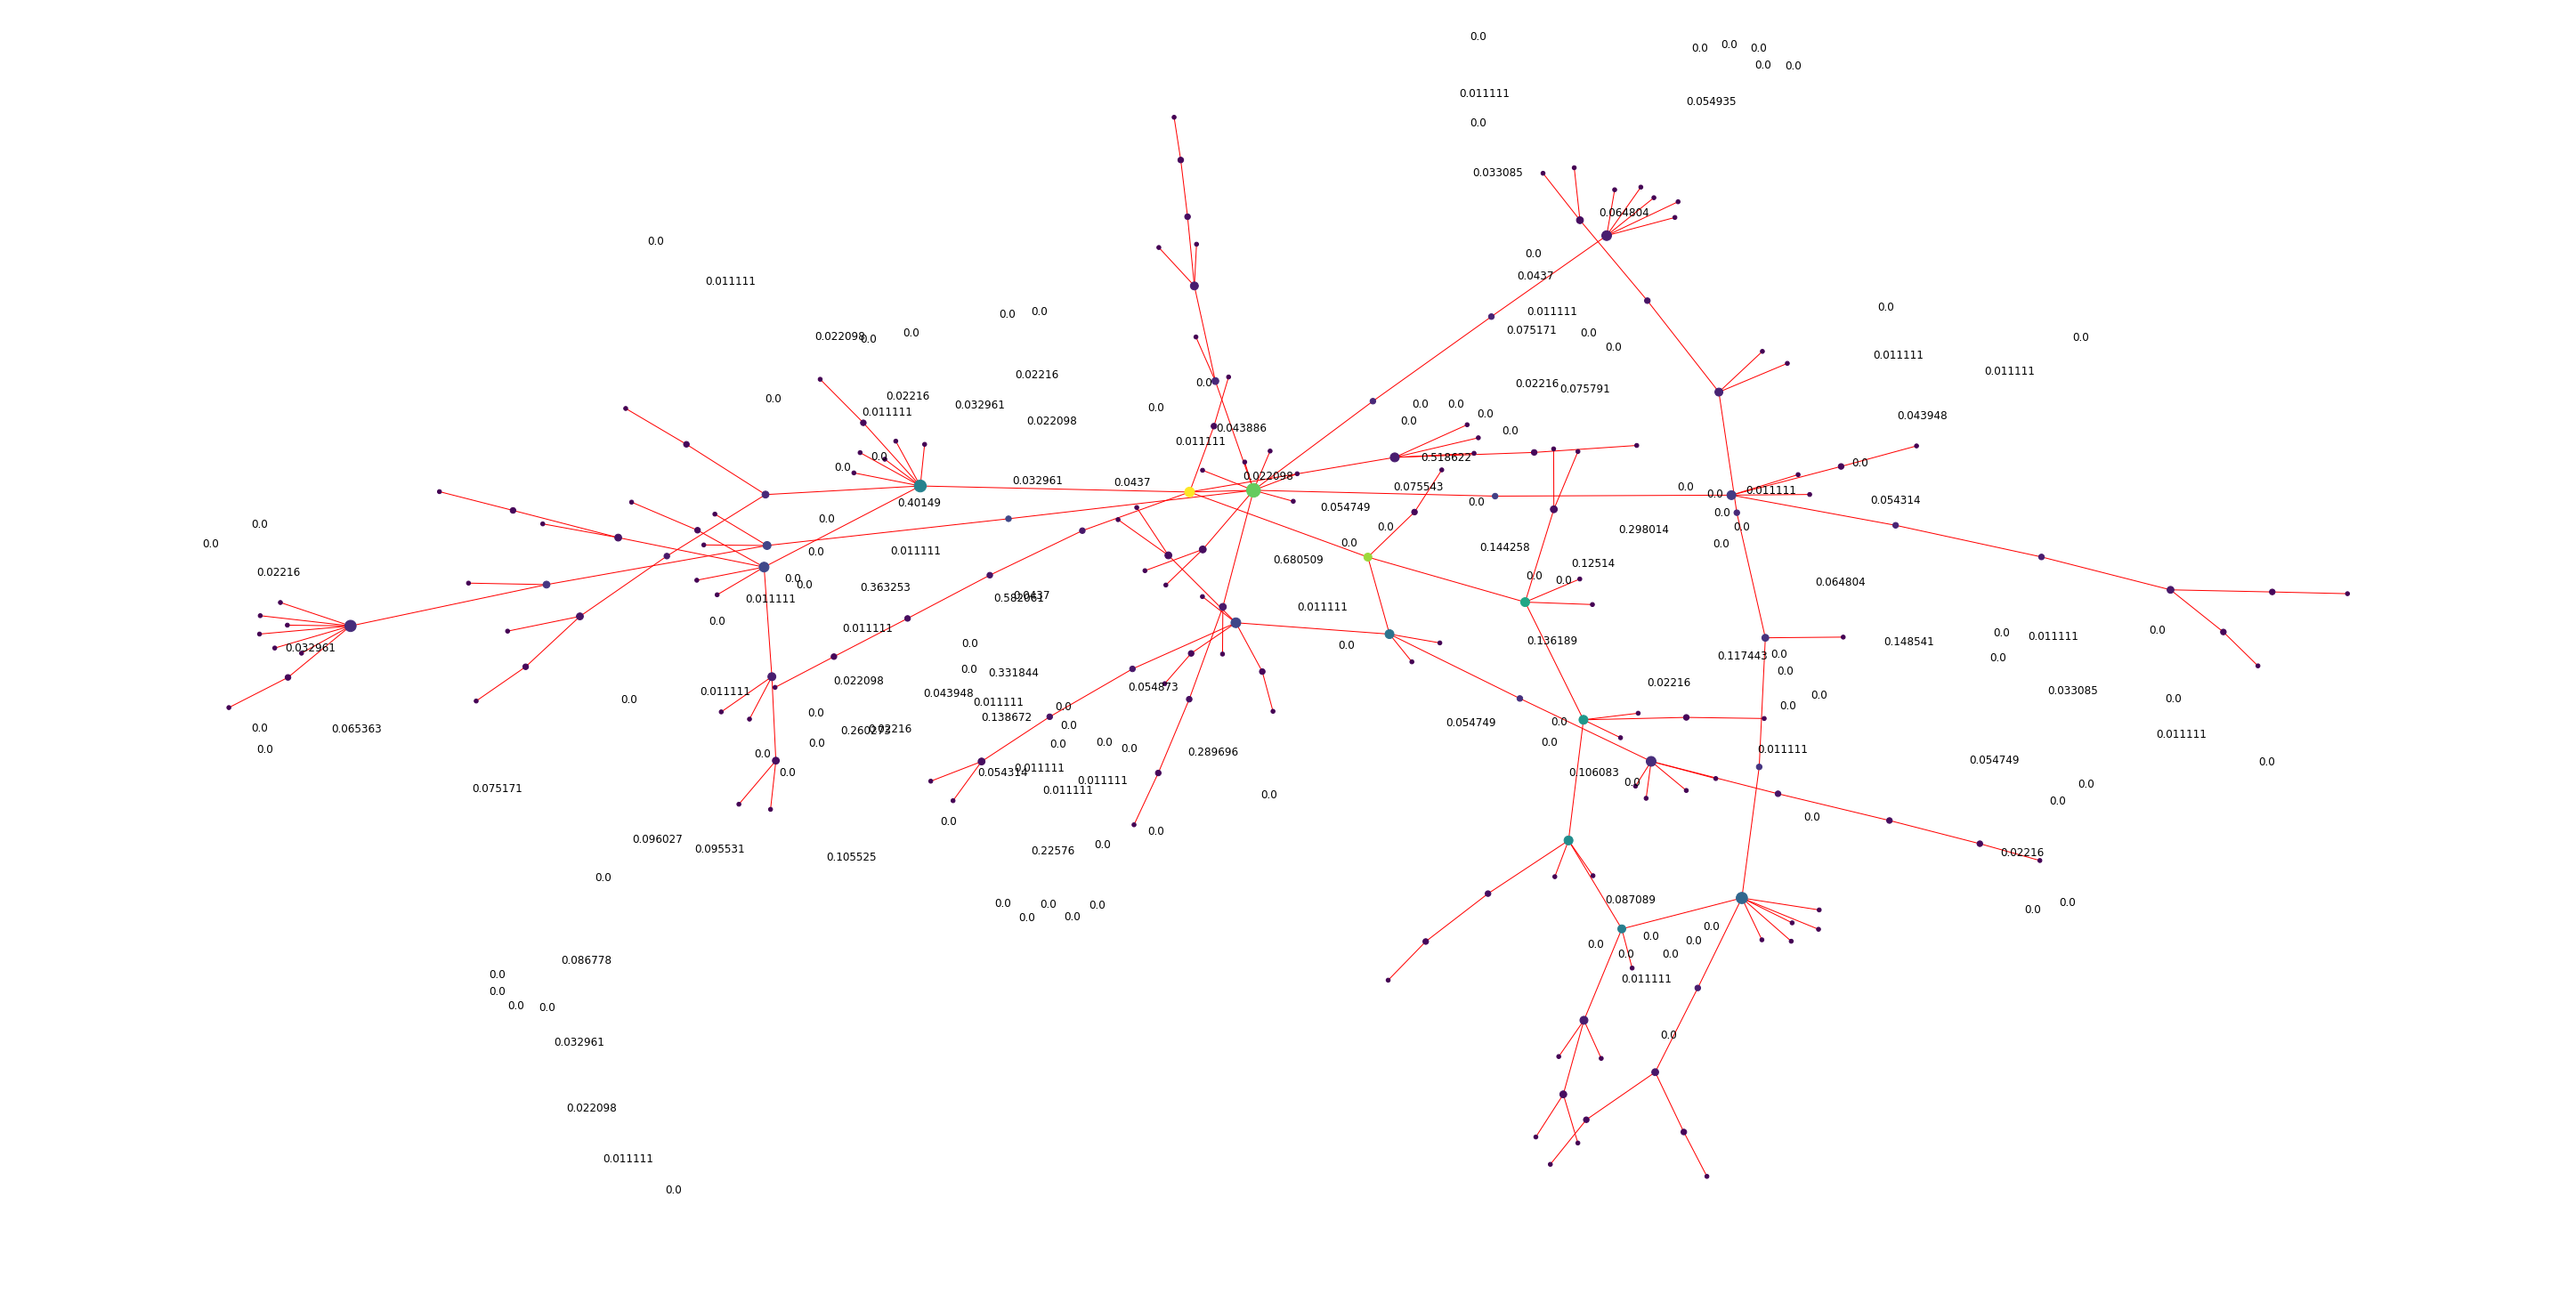

In [ ]:
cor = [inter[id] for id in H]
tamanhos = [20 * H.degree(id) for id in H]

rotulo = {}
for id in H.nodes():
  rotulo[id] = round(inter[id], 6)

pos = nx.spring_layout(H)
plt.figure(figsize =(40, 20))
nx.draw(H, node_size = tamanhos, node_color = cor, edge_color='red')
nx.draw_networkx_labels(H, pos, rotulo, font_weight = 'light', font_color = 'black');

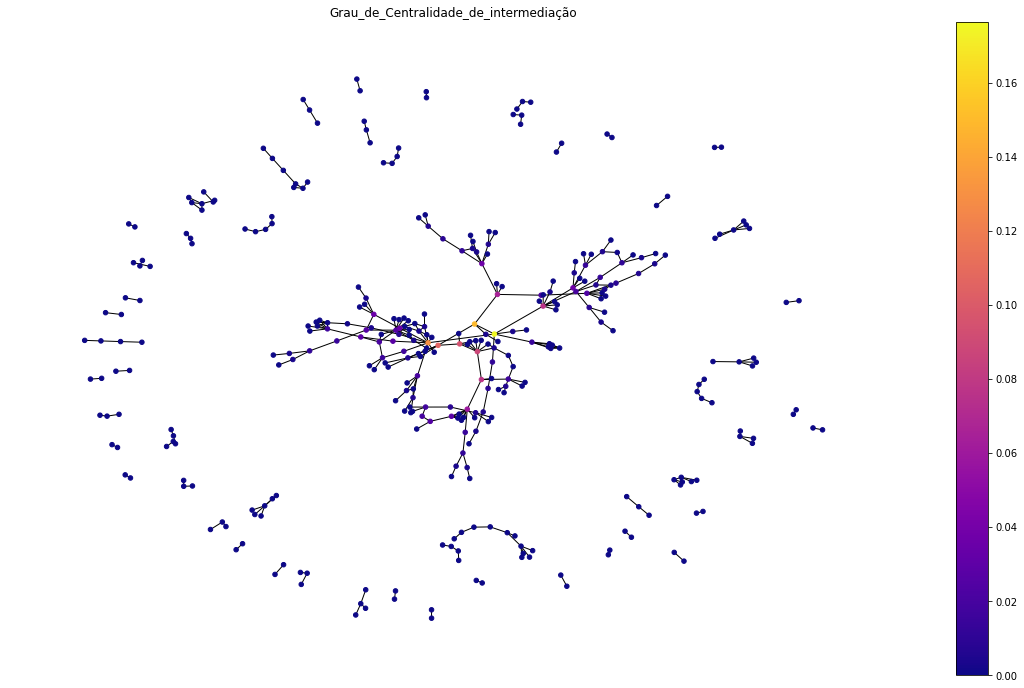

In [ ]:
def draw(G, pos, inter, Grau_de_Centralidade_de_intermediação):
    
     nodes = nx.draw_networkx_nodes(G, pos, node_size=20, cmap=plt.cm.plasma,
                                   node_color=list(inter.values()),
                                   nodelist=inter.keys())
   
     edges = nx.draw_networkx_edges(G, pos)

     plt.title(Grau_de_Centralidade_de_intermediação)
     plt.colorbar(nodes)
     plt.axis('off')
     plt.show()
pos = nx.spring_layout(G, seed=60)

plt.figure(figsize=(20, 12))
draw(G, pos, inter, 'Grau_de_Centralidade_de_intermediação')

Mais uma nez Venom aparece como sendo um ponto importante de conexão entre os personagens, visto que ele não só era o principal vértice no quesito proximidade, ele também é um ponto de intermediação entre os personagens.Se ele fosse removido os personagens perderiam um canal de informação que poderia prejudicar a rede caso Homem aranha não fosse tão ligado a outros personagens.
Hope Summers, como de se esperar, tem pouca ou nenhuma relevância como ponte entre personagens.

>Excentricidade no grafo

É a máxima distância entre dois vértices em um grafo conexo.

G, por exemplo, é desconexo, pois muitos personagens não colaboraram com outros, então não há excentricidade definida a não ser infinito como veremos:

In [ ]:
if nx.is_connected(G)==True:
   excent = nx.eccentricity(G)
   print(excent)
else:
   print("excentricidade infinita, pois é desconexo.\nTodos os vertices tem excentricidade infinita\nLogo as medidas de excentricidade, raio e diâmetro são infinitas")

excentricidade infinita, pois é desconexo.
Todos os vertices tem excentricidade infinita
Logo as medidas de excentricidade, raio e diâmetro são infinitas


o grafo de interesse H, por ser conexo, já mostra outra situação:

In [ ]:
if nx.is_connected(H)==True:
   excent = nx.eccentricity(H)
   print(excent)
else:
   print("excentricidade infinita, pois é desconexo.\nTodos os vertices tem excentricidade infinita\nLogo as medidas de excentricidade, raio e diâmetro são infinitas")

{'Hope Summers (comics)': 17, 'Cable (comics)': 16, 'Domino (comics)': 17, 'Rachel Summers': 17, 'Deadpool': 15, 'Copycat (Marvel Comics)': 18, 'Bob, Agent of Hydra': 16, 'Spider-Man': 14, 'Garrison Kane': 19, 'Venom (Marvel Comics character)': 13, 'Anya Corazon': 15, 'Spider-Man (Miles Morales)': 15, 'Prowler (comics)': 15, 'Harry Osborn': 15, 'Mockingbird (Marvel Comics)': 15, 'Wraith (Marvel Comics)': 15, 'Puma (comics)': 15, 'Black Cat (Marvel Comics)': 15, 'Kingpin (character)': 15, 'Silk (comics)': 15, 'Carnage (comics)': 14, 'Doctor Doom': 12, 'Magneto (comics)': 14, 'Red Skull': 14, 'Eddie Brock': 14, 'Spider-Woman (Jessica Drew)': 16, 'Carol Danvers': 16, 'Nova (Sam Alexander)': 16, 'Spider-Woman (Gwen Stacy)': 16, 'Hawkeye (comics)': 16, 'Iron Man': 16, 'Daredevil (Marvel Comics character)': 16, 'Carrion (comics)': 15, 'Demogoblin': 15, 'Shriek (comics)': 15, 'Doppelganger (comics)': 15, 'Titania (Marvel Comics)': 13, 'Enchantress (Marvel Comics)': 13, 'Puppet Master (Marvel 

Estes são os centros, isto é, os personagens com as menores distancias são mínimas. É um mero ´acaso', ja que os personagens não são personagens de nicho, e suas conexões com personagens maiores possibilitam que eles façam parte do centro

In [ ]:
center = nx.center(H)

print(center)

['Puppet Master (Marvel Comics)', 'Krang (Marvel Comics)']


In [ ]:
# O raio é a excentricidade mínima do grafo
radius = nx.radius(H)

print(radius)

11


In [ ]:
#o diametro é a excentricidade máxima, o maior dos menores caminhos
diameter = nx.diameter(H)

print(diameter)

21


Abaixo os vértices mais periféricos do grafo, que possuem as maiores distancias em relação a outro vértice. Mariko Yashida, por exemplo, é um deles, por ser uma personagem do nicho do Wolverine apenas, ela nem mesmo se relaciona com outros X-Men, que são personagens do núcleo dele.

In [ ]:
periphery = nx.periphery(H)

print(periphery)

['Abigail Brand', 'Mariko Yashida', 'Spidercide', 'Tarantula (Marvel Comics)']


>CENTRALIDADE DE EFICIÊNCIA

In [ ]:
eccentricity = nx.eccentricity(H)

print(eccentricity)

{'Hope Summers (comics)': 17, 'Cable (comics)': 16, 'Domino (comics)': 17, 'Rachel Summers': 17, 'Deadpool': 15, 'Copycat (Marvel Comics)': 18, 'Bob, Agent of Hydra': 16, 'Spider-Man': 14, 'Garrison Kane': 19, 'Venom (Marvel Comics character)': 13, 'Anya Corazon': 15, 'Spider-Man (Miles Morales)': 15, 'Prowler (comics)': 15, 'Harry Osborn': 15, 'Mockingbird (Marvel Comics)': 15, 'Wraith (Marvel Comics)': 15, 'Puma (comics)': 15, 'Black Cat (Marvel Comics)': 15, 'Kingpin (character)': 15, 'Silk (comics)': 15, 'Carnage (comics)': 14, 'Doctor Doom': 12, 'Magneto (comics)': 14, 'Red Skull': 14, 'Eddie Brock': 14, 'Spider-Woman (Jessica Drew)': 16, 'Carol Danvers': 16, 'Nova (Sam Alexander)': 16, 'Spider-Woman (Gwen Stacy)': 16, 'Hawkeye (comics)': 16, 'Iron Man': 16, 'Daredevil (Marvel Comics character)': 16, 'Carrion (comics)': 15, 'Demogoblin': 15, 'Shriek (comics)': 15, 'Doppelganger (comics)': 15, 'Titania (Marvel Comics)': 13, 'Enchantress (Marvel Comics)': 13, 'Puppet Master (Marvel 

Abaixo temos uma representação da excentricidade do grafo H

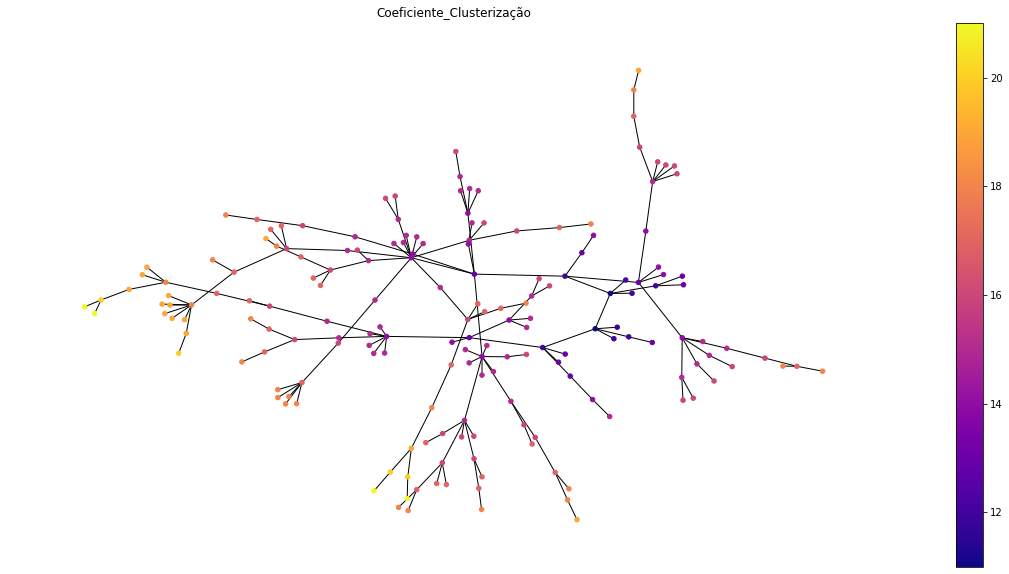

In [ ]:
def draw(H, pos, eccentricity, Coeficiente_Clusterização):
    
     nodes = nx.draw_networkx_nodes(H, pos, node_size=20, cmap=plt.cm.plasma,
                                   node_color=list(eccentricity.values()),
                                   nodelist=eccentricity.keys())
   
     edges = nx.draw_networkx_edges(H, pos)

     plt.title(Coeficiente_Clusterização)
     plt.colorbar(nodes)
     plt.axis('off')
     plt.show()
pos = nx.spring_layout(H, seed=60)

plt.figure(figsize=(20, 10))
draw(H, pos, eccentricity, 'Coeficiente_Clusterização')

>Coeficiente de Clusterização

Nada mais é que uma medida de grau em que os vértices em um gráfico tendem a se agrupar.
O cálculo é simplesmente o n° de arestas que ligam os vizinhos de um nó dividido pela quantidade máxima de arestas possíveis entre os vizinhos do nó.

In [ ]:
cluster=nx.clustering(H)
print(cluster)

{'Hope Summers (comics)': 0, 'Cable (comics)': 0, 'Domino (comics)': 0, 'Rachel Summers': 0, 'Deadpool': 0, 'Copycat (Marvel Comics)': 0, 'Bob, Agent of Hydra': 0, 'Spider-Man': 0, 'Garrison Kane': 0, 'Venom (Marvel Comics character)': 0, 'Anya Corazon': 0, 'Spider-Man (Miles Morales)': 0, 'Prowler (comics)': 0, 'Harry Osborn': 0, 'Mockingbird (Marvel Comics)': 0, 'Wraith (Marvel Comics)': 0, 'Puma (comics)': 0, 'Black Cat (Marvel Comics)': 0, 'Kingpin (character)': 0, 'Silk (comics)': 0, 'Carnage (comics)': 0, 'Doctor Doom': 0, 'Magneto (comics)': 0, 'Red Skull': 0, 'Eddie Brock': 0, 'Spider-Woman (Jessica Drew)': 0, 'Carol Danvers': 0, 'Nova (Sam Alexander)': 0, 'Spider-Woman (Gwen Stacy)': 0, 'Hawkeye (comics)': 0, 'Iron Man': 0, 'Daredevil (Marvel Comics character)': 0, 'Carrion (comics)': 0, 'Demogoblin': 0, 'Shriek (comics)': 0, 'Doppelganger (comics)': 0, 'Titania (Marvel Comics)': 0, 'Enchantress (Marvel Comics)': 0, 'Puppet Master (Marvel Comics)': 0, 'Garokk': 0, 'Baron Struc

Todos os personagens tem coeficiente de clusterização 0 ou bem próximo de zero, isso significa que eles não estão contectados a tantos vertices nos quais poderiam, o que é verdade: muitos personagens não são famosos e por isso não colaboram muito com outros em termos de narativa.

In [ ]:
# coeficiente de clusterizacao global
print(nx.average_clustering(H))

0.0


O coeficiente de clusterização global indica a mesma coisa, o número de conexões que este grafo poderia ter deixa muito a desejar, e isto se deve a questão de os personagens quase sempre permanecerem em seus núcleos.

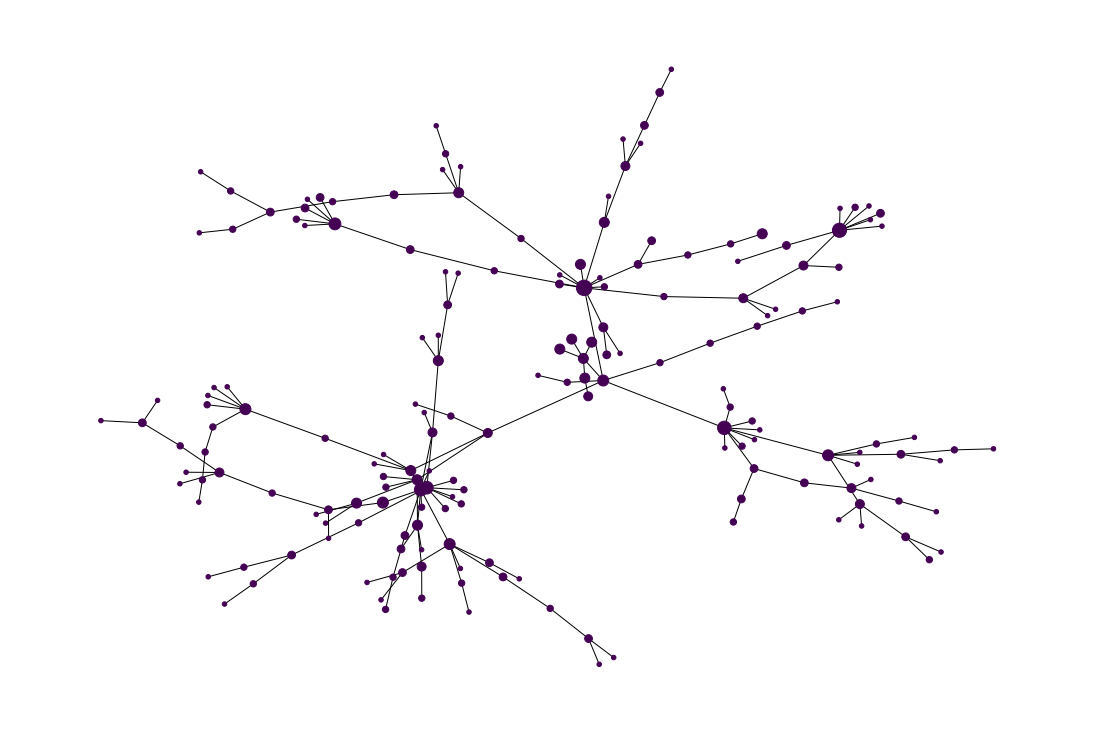

In [ ]:
col = [cluster[id] for id in H]
tamanhos = [20 * G.degree(id) for id in H]

rotulos = {}
for id in H.nodes():
  rotulos[id] = round(cluster[id], 3)

pos = nx.spring_layout(H)


plt.figure(figsize =(15, 10))

nx.draw(H, pos, node_size = tamanhos, node_color = col)

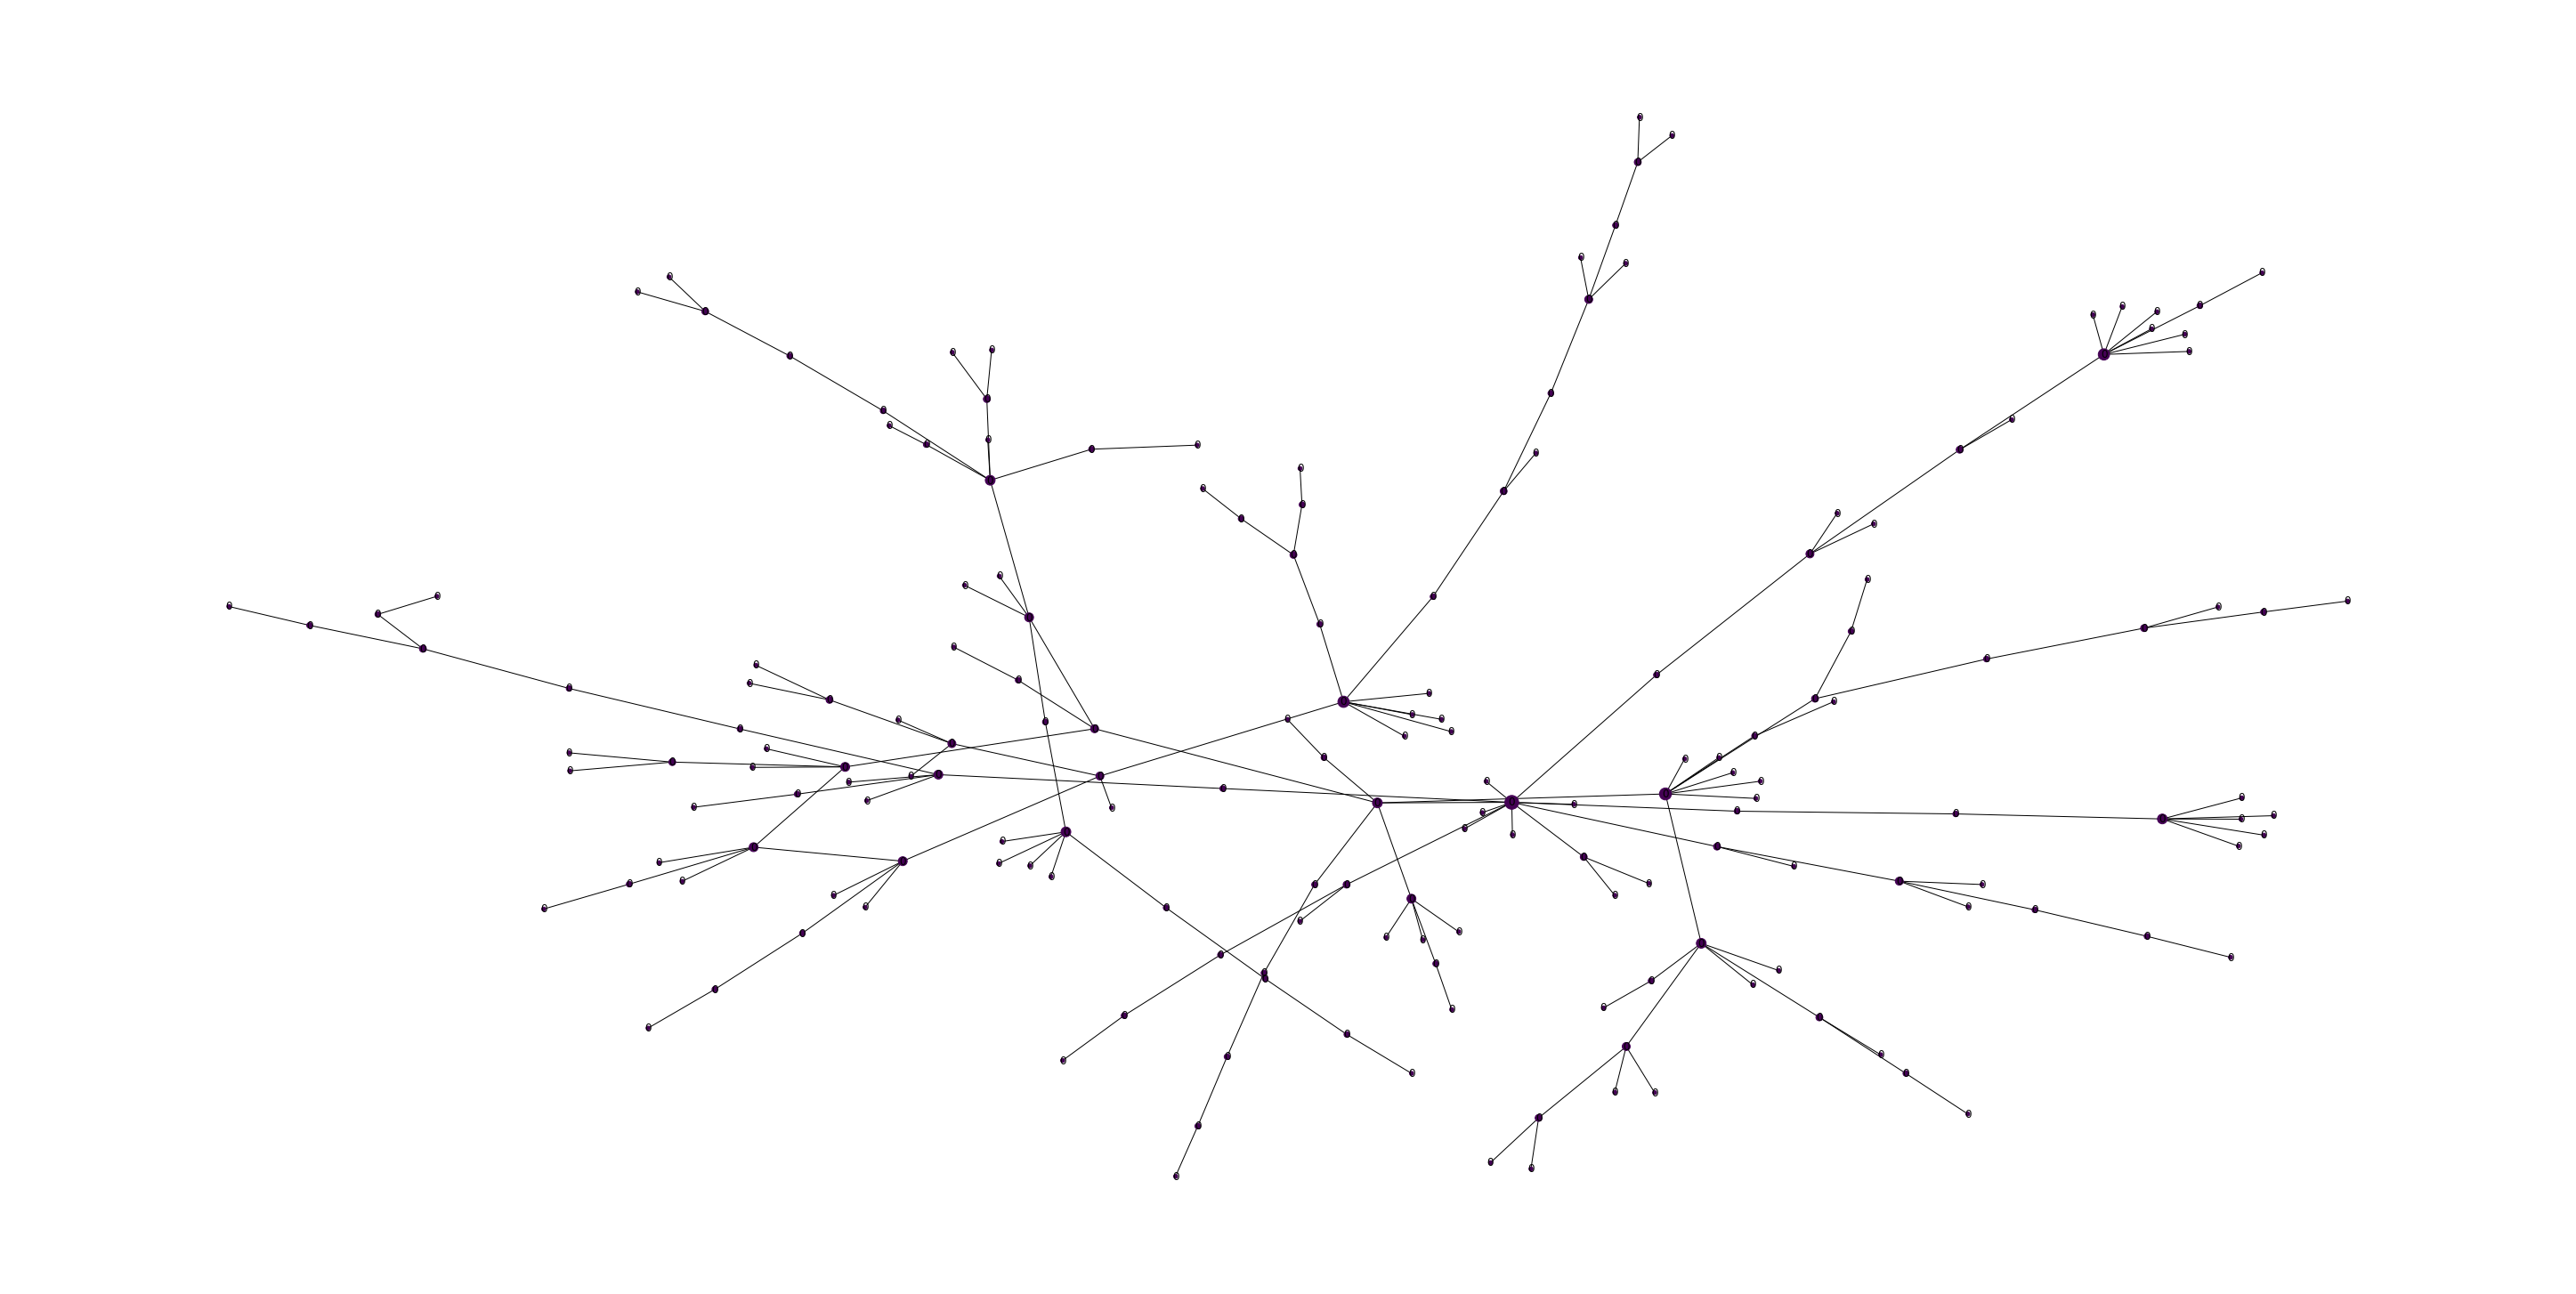

In [ ]:
col = [cluster[id] for id in H]
tamanhos = [20 * H.degree(id) for id in H]

rotulos = {}
for id in H.nodes():
  rotulos[id] = round(cluster[id], 3)

pos = nx.spring_layout(H)


plt.figure(figsize =(40, 20))

nx.draw(H, pos, node_size = tamanhos, node_color = col)
nx.draw_networkx_labels(H, pos, rotulos, font_weight = 'light', font_color = 'black');

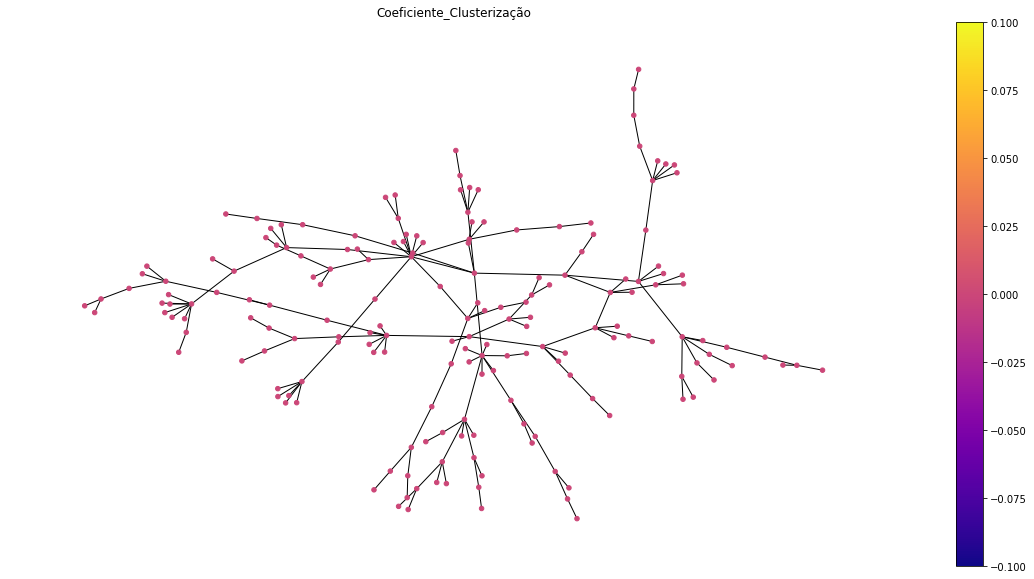

In [ ]:
def draw(H, pos, cluster, Coeficiente_Clusterização):
    
     nodes = nx.draw_networkx_nodes(H, pos, node_size=20, cmap=plt.cm.plasma,
                                   node_color=list(cluster.values()),
                                   nodelist=cluster.keys())
   
     edges = nx.draw_networkx_edges(H, pos)

     plt.title(Coeficiente_Clusterização)
     plt.colorbar(nodes)
     plt.axis('off')
     plt.show()
pos = nx.spring_layout(H, seed=60)

plt.figure(figsize=(20, 10))
draw(H, pos, cluster, 'Coeficiente_Clusterização')

 >Transitividade

Em grafos, é a probabilidade geral de haver vertices adjacentes interconectados, indicando que existem de comunidades/subgrupos fortemente conectados entre si

In [ ]:
Tr=nx.transitivity(H)
Tr

0

In [ ]:
print('Transitividade do grafo com 4 casas decimais:')
print(round(Tr, 4))

Transitividade do grafo com 4 casas decimais:
0


In [ ]:
Tr=nx.transitivity(G)
Tr

0.21941489361702127

Há subgrupos bem conectados, como o do homem aranha, mas a maior parte deles é mais isolado e não é tão conectado entre si porque os personagens raramente interagem entre os grupos fora do seu.

>Densidade do Grafo:

Uma relação que se dá entre o número de arestas e os dos vertices do Grafo, isto é, o número de arestas dita a densidade do grafo.

In [ ]:
densidade = 2*G.size() / (G.order()*(G.order() - 1))
print('densidade:', densidade)

densidade: 0.00566516577977896


In [ ]:
densidade = 2*H.size() / (H.order()*(H.order() - 1))
print('densidade:', densidade)

densidade: 0.011049723756906077


>Distribuição de Grau

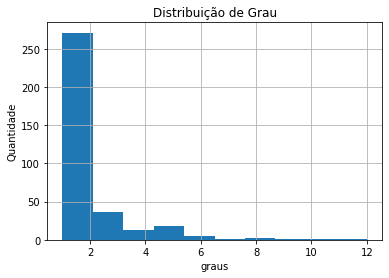

In [ ]:
grau = [G.degree(id) for id in G.nodes()]

plt.hist(grau)
plt.title("Distribuição de Grau")
plt.ylabel("Quantidade")
plt.xlabel("graus")
plt.grid(True)

plt.show()

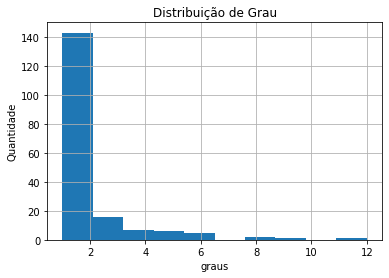

In [ ]:
grau = [H.degree(id) for id in H.nodes()]

plt.hist(grau)
plt.title("Distribuição de Grau")
plt.ylabel("Quantidade")
plt.xlabel("graus")
plt.grid(True)

plt.show()

Poucas mudanças ocorreram na distribuição de grau do grafo. Isto se dá por que a maioria dos subgrafos fora de H eram de número baixo.

>Grau Médio

In [ ]:
size = []
for (source, target) in G.degree():
  size.append(target)

av_degree = G.size() / G.order()

print('O grau médio do Grafo é:', round(av_degree, 3))

O grau médio do Grafo é: 0.989


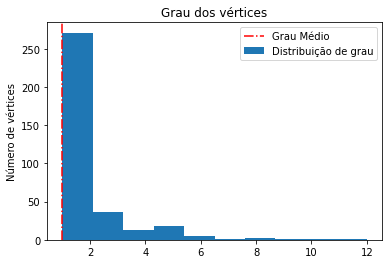

In [ ]:
plt.hist(size,label='Distribuição de grau')
plt.axvline(av_degree,color='red',linestyle='dashdot',label='Grau Médio')
plt.legend()
plt.ylabel('Número de vértices')
plt.title('Grau dos vértices')
plt.show()

In [ ]:
size = []
for (source, target) in G.degree():
  size.append(target)

av_deg = H.size() / H.order()

print('O grau médio do Grafo é:', round(av_deg, 3))

O grau médio do Grafo é: 0.994


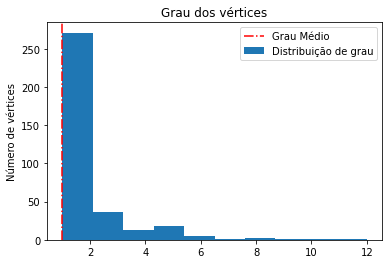

In [ ]:
plt.hist(size,label='Distribuição de grau')
plt.axvline(av_deg,color='red',linestyle='dashdot',label='Grau Médio')
plt.legend()
plt.ylabel('Número de vértices')
plt.title('Grau dos vértices')
plt.show()

Ambos obviamente possuem grau médio muito próximo de 1, resultado para um grafo de ordem e tamanho de mesmo número.

>Coreness

Coreness é uma medida que pode ajudar a identificar grupos altamente interconectados em uma rede. 
Um k-core é um grupo máximo de objetos que estão todos conectados a pelo menos k outros objetos no grupo; a métrica que pode ajudar a identificar pequenas áreas centrais interconectadas em um grafo.

In [ ]:
core = nx.core_number(H)
print(core)

{'Hope Summers (comics)': 1, 'Cable (comics)': 1, 'Domino (comics)': 1, 'Rachel Summers': 1, 'Deadpool': 1, 'Copycat (Marvel Comics)': 1, 'Bob, Agent of Hydra': 1, 'Spider-Man': 1, 'Garrison Kane': 1, 'Venom (Marvel Comics character)': 1, 'Anya Corazon': 1, 'Spider-Man (Miles Morales)': 1, 'Prowler (comics)': 1, 'Harry Osborn': 1, 'Mockingbird (Marvel Comics)': 1, 'Wraith (Marvel Comics)': 1, 'Puma (comics)': 1, 'Black Cat (Marvel Comics)': 1, 'Kingpin (character)': 1, 'Silk (comics)': 1, 'Carnage (comics)': 1, 'Doctor Doom': 1, 'Magneto (comics)': 1, 'Red Skull': 1, 'Eddie Brock': 1, 'Spider-Woman (Jessica Drew)': 1, 'Carol Danvers': 1, 'Nova (Sam Alexander)': 1, 'Spider-Woman (Gwen Stacy)': 1, 'Hawkeye (comics)': 1, 'Iron Man': 1, 'Daredevil (Marvel Comics character)': 1, 'Carrion (comics)': 1, 'Demogoblin': 1, 'Shriek (comics)': 1, 'Doppelganger (comics)': 1, 'Titania (Marvel Comics)': 1, 'Enchantress (Marvel Comics)': 1, 'Puppet Master (Marvel Comics)': 1, 'Garokk': 1, 'Baron Struc

In [ ]:

print('Coreness do Grafo:')
print(max(core.values()))

Coreness do Grafo:
1


Como o coreness do grafo é 1, então o máximo k-core dos vértices é 1.

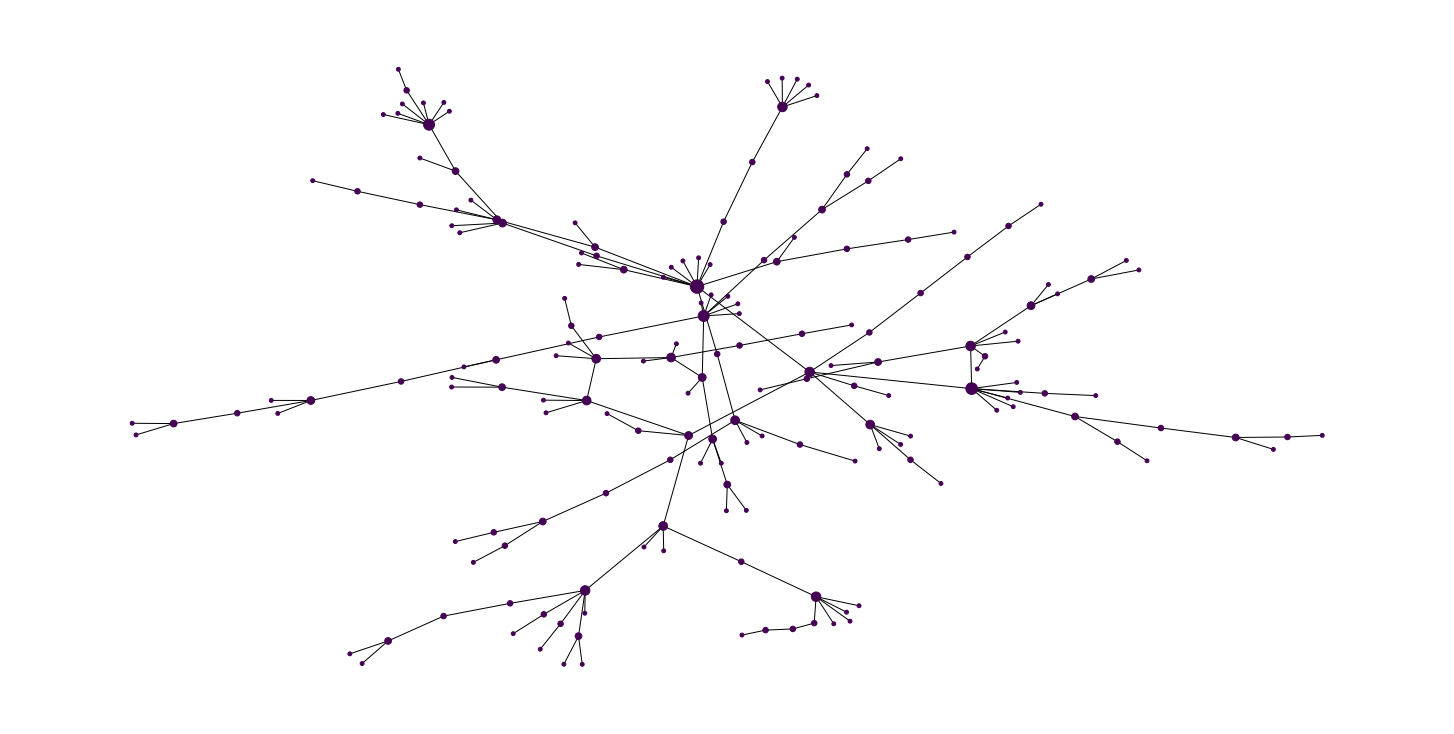

In [ ]:
paint = [core[id] for id in H]
tamanhos = [15 * H.degree(id) for id in H]

lab = {}
for id in H.nodes():
  lab[id] = round(core[id], 3)

pos = nx.spring_layout(H)


plt.figure(figsize =(20, 10))

nx.draw(H, pos, node_size = tamanhos, node_color = paint)

Ao dar zoom é possível ver na próxima figura os rótulos com mais clareza

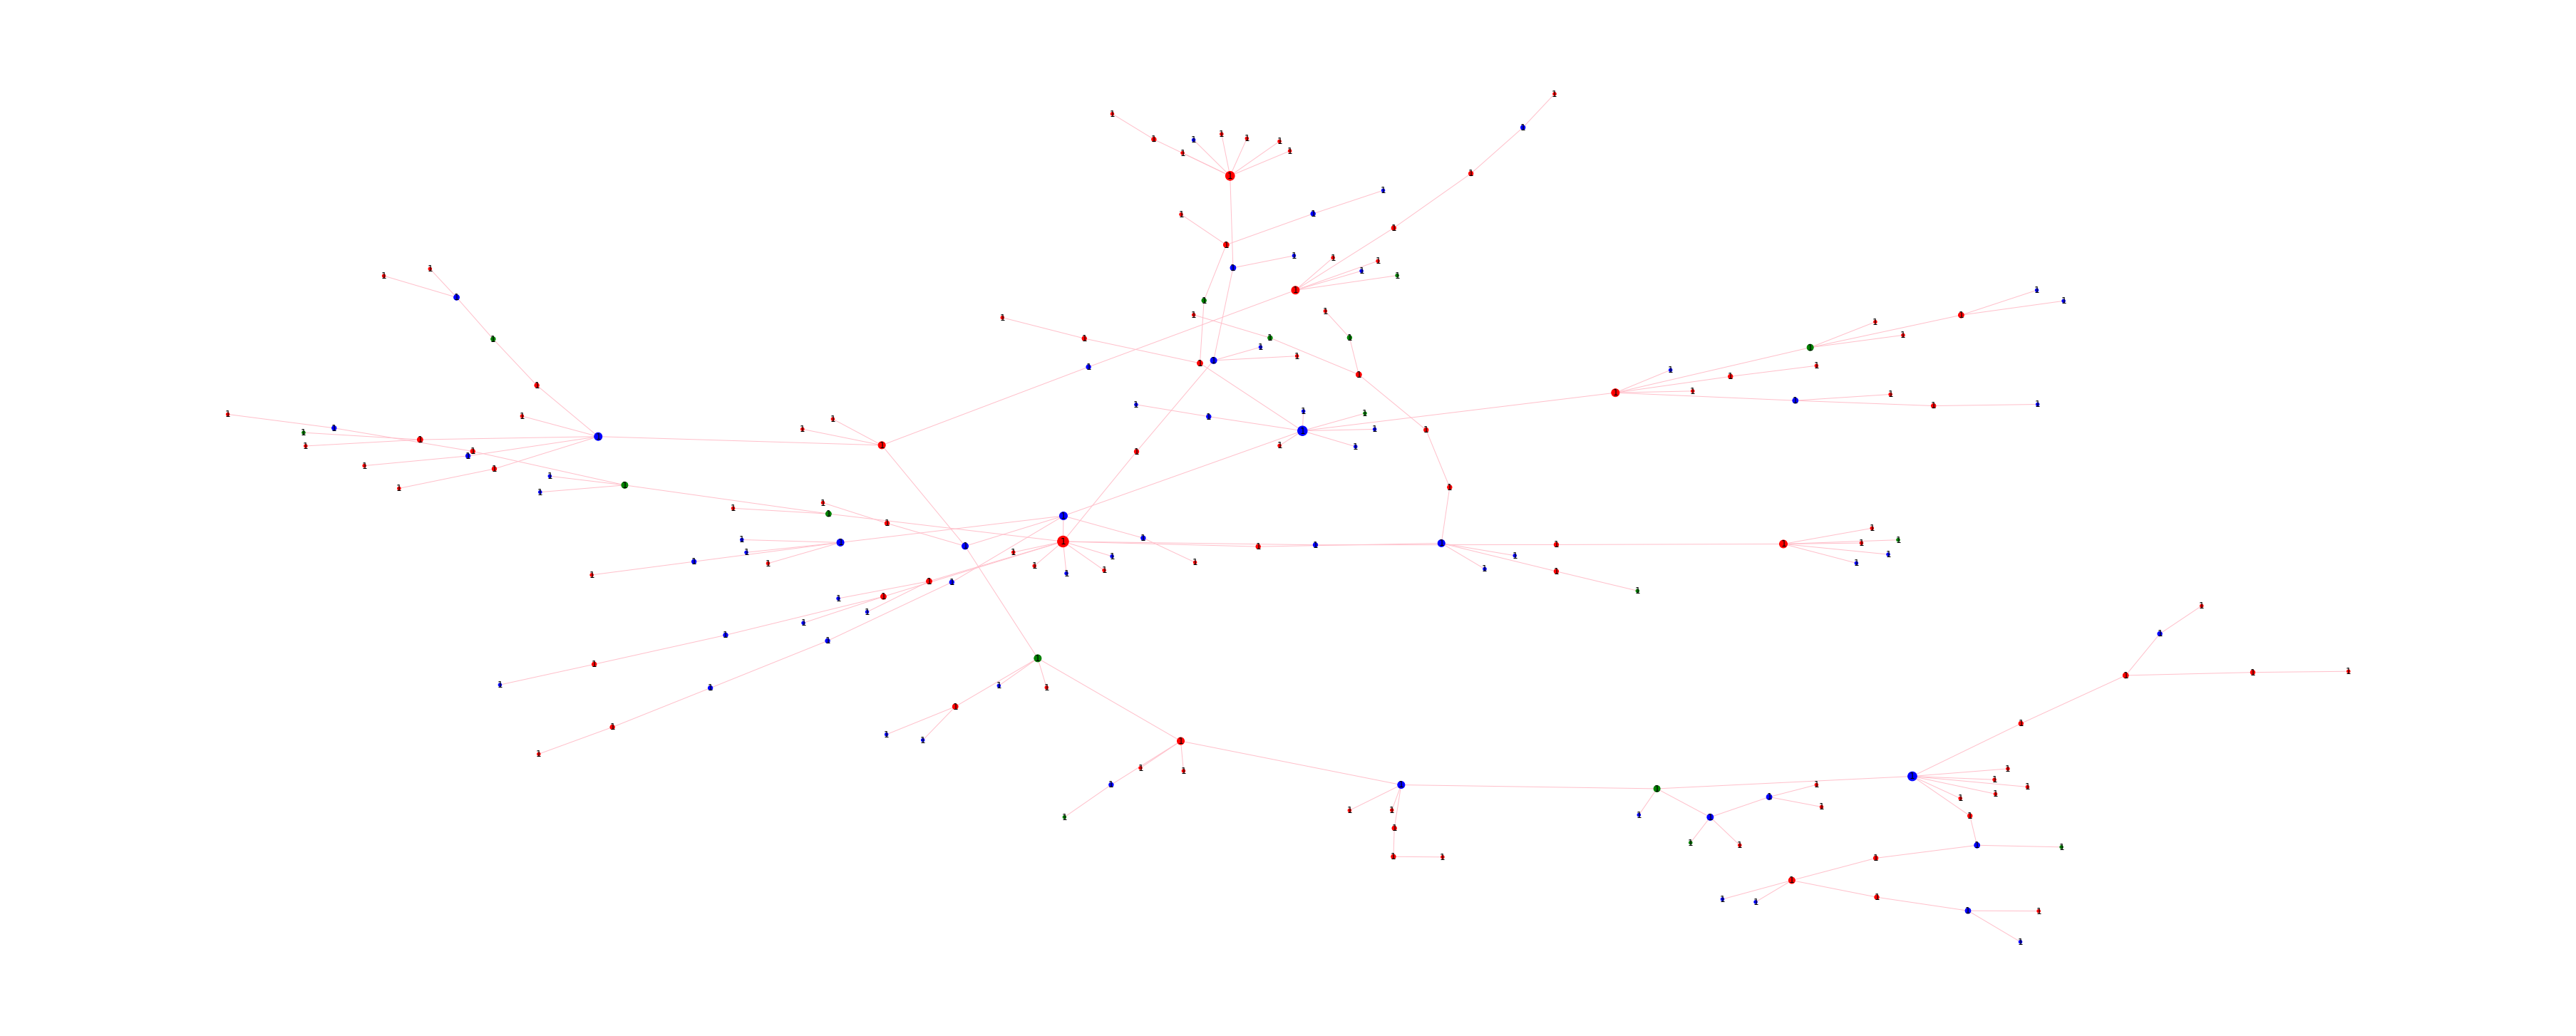

In [ ]:
paint = [core[id] for id in H]
tamanhos = [20 * H.degree(id) for id in H]

lab = {}
for id in H.nodes():
  lab[id] = round(core[id], 3)

pos = nx.spring_layout(H)




plt.figure(figsize =(50, 20))


nx.draw(H, pos, node_size = tamanhos, node_color = node_color, edge_color='pink', font_size=30)
nx.draw_networkx_labels(H, pos, lab, font_weight = 'light', font_color = 'black');

Abaixo uma representação do grafo indicando que o Coreness no grafo é 1, de todos os vértices. O grafo é do tipo árvore, significa que boa parte de seus nós temconexão com no máximo 2 vértices.

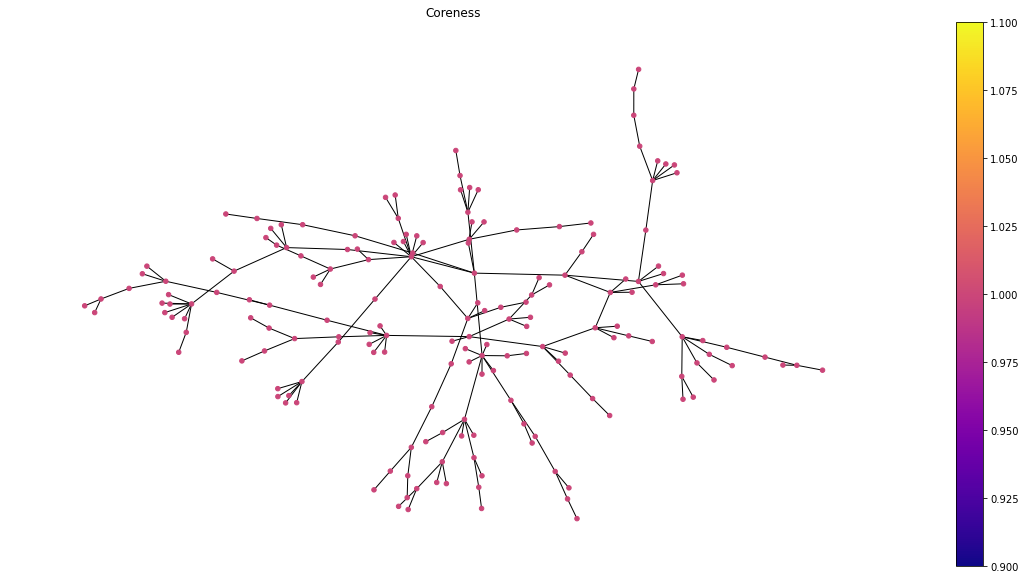

In [ ]:
def draw(H, pos, core, Coreness):
    
     nodes = nx.draw_networkx_nodes(H, pos, node_size=20, cmap=plt.cm.plasma,
                                   node_color=list(core.values()),
                                   nodelist=core.keys())
   
     edges = nx.draw_networkx_edges(H, pos)

     plt.title(Coreness)
     plt.colorbar(nodes)
     plt.axis('off')
     plt.show()
pos = nx.spring_layout(H, seed=60)


plt.figure(figsize=(20, 10))
draw(H, pos, core, 'Coreness')

.


.

.

#Gephi

Importanto os dados para o gephi obtemos em um primeiro momento um grafo bastante genério e de difícil visualização das informações mais relevantes. Contudo ao manipularmos os dados à partir de ferramentas para evidenciar certas características obtemos o seguinte grafo.

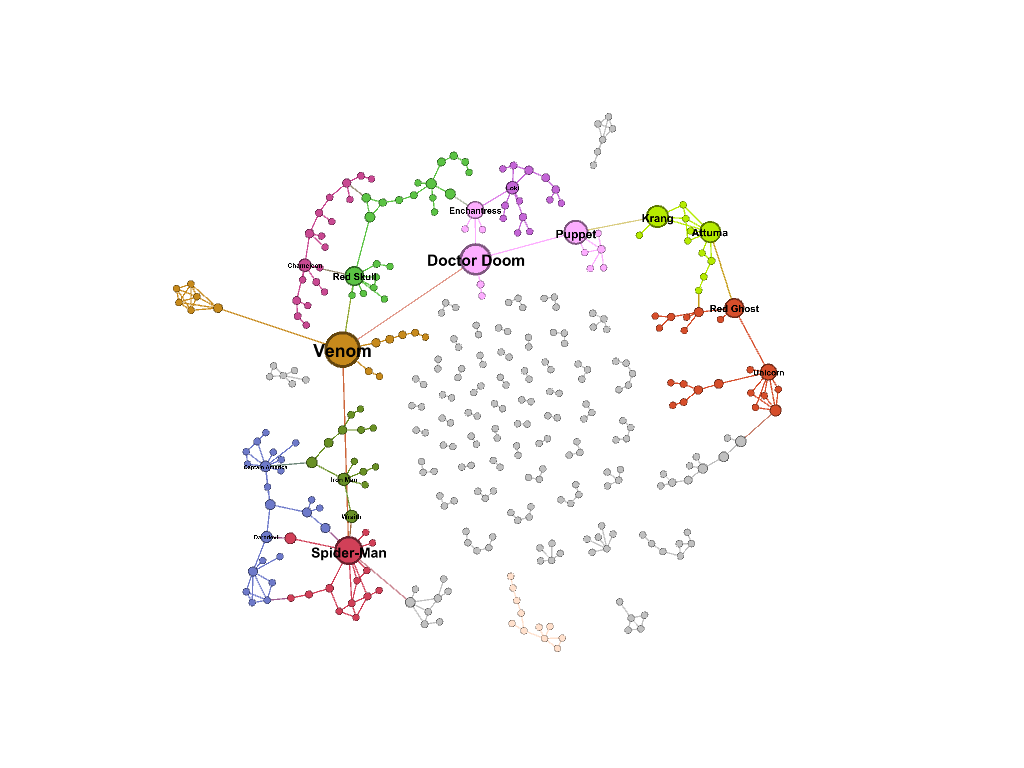

Ao manipular o grafo, optamos por valorizar a centralidade de intermediação (Betweenness centrality), cujo gráfico de distribuição é o seguinte.

Tivemos resultados como o diâmetro do grafo:21 e o caminho médio :7,8272

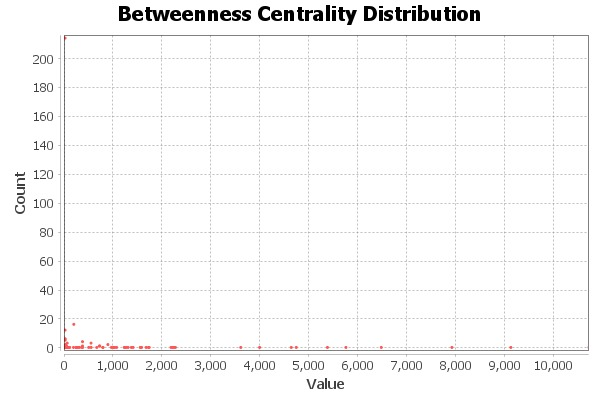

Essa característica mede à partir do calculos de caminhos mais curtos entre 2 nós, a importância e influência de cada nó para o funcionamento da rede, aplicando ao nosso grafo, os maiores nós possuem maior centralidade, temos a influência e intermediação dos personagens dentro da rede, é possível observar 3 nós principais (Venon, Spider-Man e Doctor Doom) como sendo os mais influentes do grafo, ou seja são personagens que possuem relações centrais entre os demais, sendo um intermédio no fluxo de informações entre 2 outros, possuindo uma participação mais ativa nos processos de interação.

Outra funcionalidade utilizada para uma melhor visualização foi a Modularidade, que leva em conta a clusterização do grafo, ou seja mostra quão bem um nós está atrelado a sua vizinhança, evidênciando comunidades de nós, os quais possuem uma relação mais próxima de conexão, que ficaram representados por cores diferentes.

A modularidade do grafo foi 0,908, e ficou evidente 67 comunidades diferentes.

Obtivémos, também o gráfico a seguir.

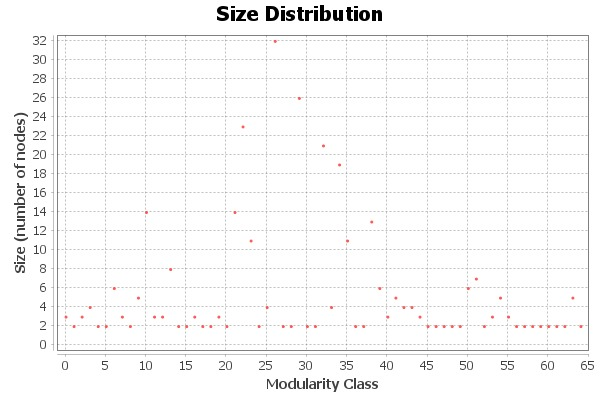

Ao observar o grafo notamos 10 grupos, coloridos com cores distintas, e pequenas áreas e partes coloridas de cinza. As áreas coloridas de cinza, em geral, não possuem coeficiente grande de clusterização, um vez que são porções deconexas do grafo, trazendo pouca colaboração a rede de informação. Já nas porções coloridas é interessante notar que todas possuem pelo menos vértice mais central (evidenciado pelo tamanho maior), esse nó é relevante para a transmmissão de informação entre grupos e internamente à comunidade.

Aqui vemos uma nova versão do grafo evidenciando todas as 67 diferentes comunidades.

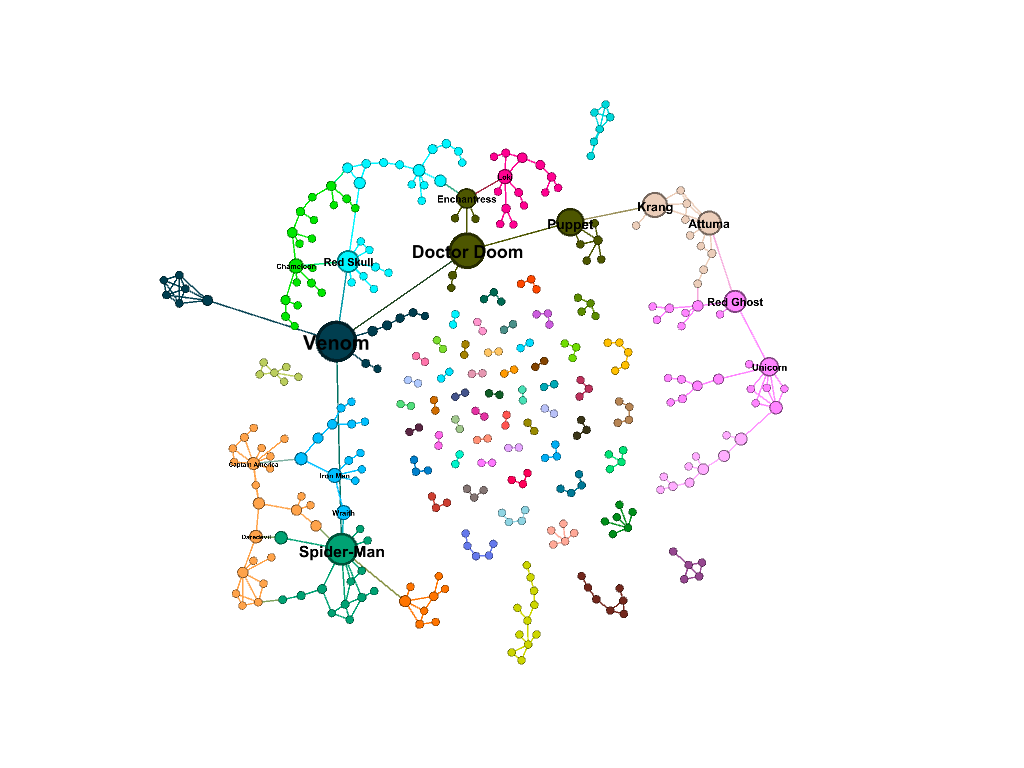

Podemos notar também que existem diversas porções desconexas no grafo, que não colaboram muito para o fluxo da rede. É interessante avaliar um subgrafo de corness 2, removendo assim o vértices que possuem grau menor que 2.


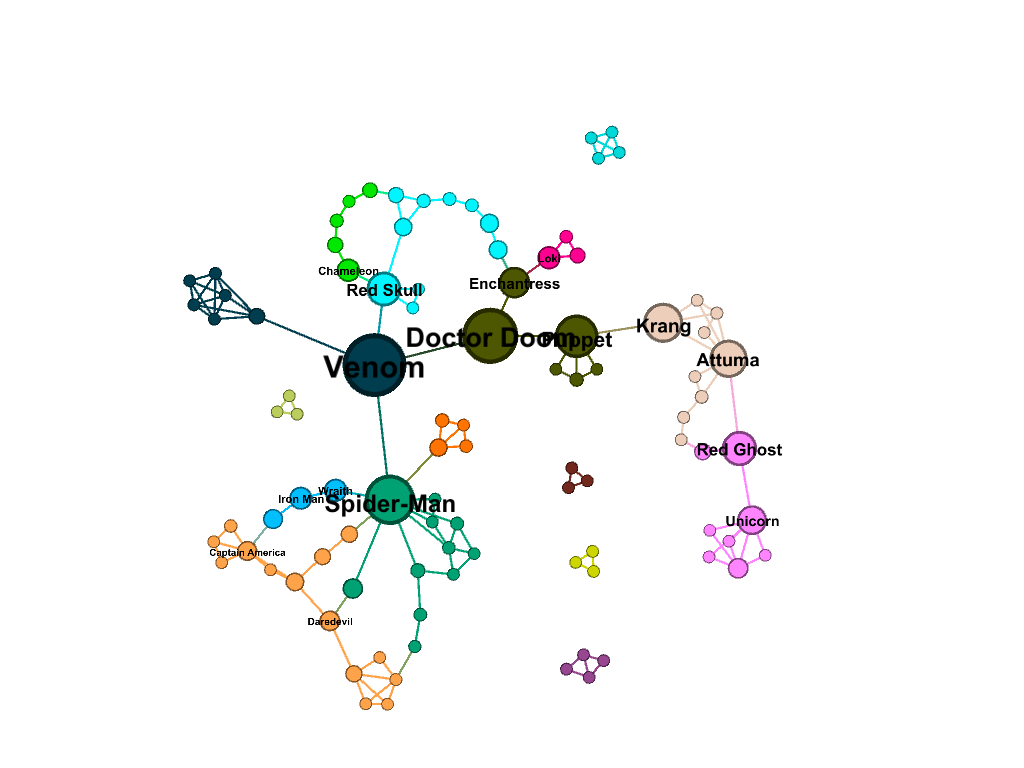

## Considerações Finais

      conceitos e estruturas de código baseadas nas aulas e na seguinte fonte:
       

      https://cambridge-intelligence.com/keylines-faqs-social-network-analysis/

         Todos os membros do grupo contribuíram com porcentagens iguais. 

*Absque sudore et labore nullum opus perfectum est*